# 🏏 The Untold Stories of IPL – Beyond the Numbers  
**Exploratory Data Analysis | IPL 2008–2024**  
Uncovering team dominance, player impact, pressure performance, and the psychology of cricket through data storytelling.


## 🔹 Introduction

The Indian Premier League (IPL) is not just a cricket tournament—it's a spectacle where heroes are born, rivalries ignite, and underdogs rise. Most analyses stop at runs, wickets, and win percentages. This project goes beyond the surface, diving deep into IPL's narratives using data.

Through this EDA, we aim to tell compelling stories about consistent players, playoff performers, cursed matchups, and fan-following trends—helping us understand what truly drives success in one of the most dynamic sporting leagues globally.


## 🔹 Dataset Overview

We utilize three main datasets to conduct this analysis:

### 🏏 1. IPL Ball-by-Ball Data (`Ipl20.csv`)
Granular delivery-level data for every match from 2008 to 2024.
- `match_id`, `inning`, `batting_team`, `bowling_team`
- `over`, `ball`, `batter`, `bowler`, `non_striker`
- `batsman_runs`, `extra_runs`, `total_runs`, `extras_type`
- `is_wicket`, `player_dismissed`, `dismissal_kind`, `fielder`

➡️ **Use:** Ideal for player-wise performance trends, pressure analysis, consistency metrics.

---

### 🏟️ 2. Match Summary Data (`Updated_Matches.csv`)
Metadata for each IPL match played.
- `id`, `season`, `city`, `date`, `match_type`, `player_of_match`, `venue`
- `team1`, `team2`, `toss_winner`, `toss_decision`, `winner`, `result`, `result_margin`
- `target_runs`, `target_overs`, `super_over`, `method`, `umpire1`, `umpire2`

➡️ **Use:** Enables season-wise trends, toss impact, venue analysis, and playoff breakdowns.

---

### 📈 3. Team Brand Value Dataset (`cleaned_brand_value_long_format.csv`)
Annual team popularity measured via brand valuation.
- `Team`, `BrandValue`, `Year`

➡️ **Use:** Helps correlate on-field performance with off-field fan growth and brand influence.

---

These datasets provide both numeric and categorical data, allowing us to explore IPL from multiple angles—performance, psychology, pressure, and popularity.


## 👑 Kings of Runs – Who Rules the Scoreboard?

Who are IPL’s most consistent run-scorers? Are some batters dominating season after season, regardless of team outcomes?

> We use a **Rose Chart (Polar Bar Chart)** to spotlight players who repeatedly finish among top run-getters, highlighting the legends of consistency.


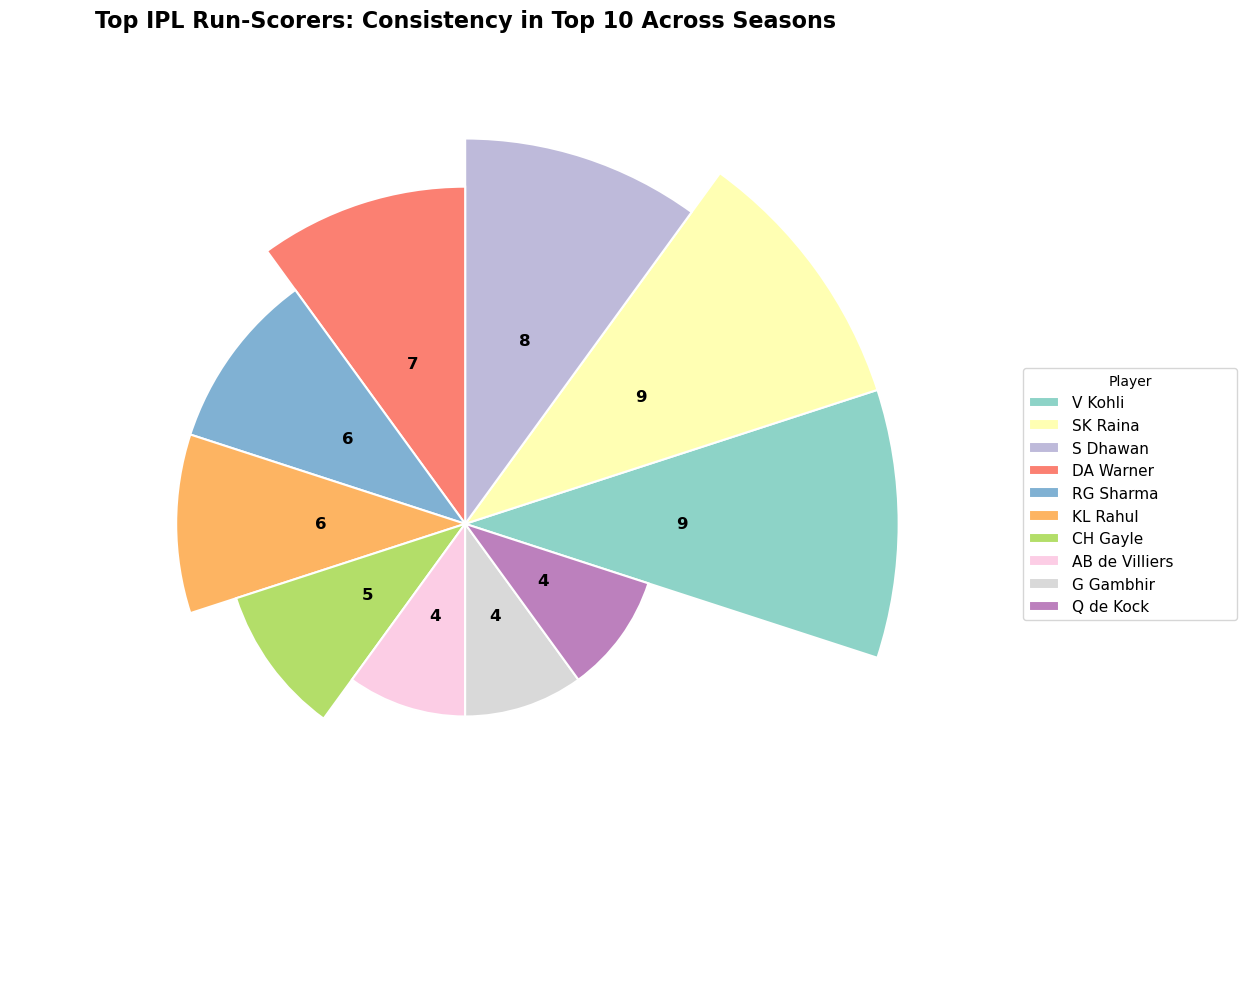

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

history_df = pd.read_csv("/Users/sainihalkonduti/Downloads/Ipl20.csv")
matches_df = pd.read_csv("/Users/sainihalkonduti/Downloads/Updated_Matches.csv")

history_df.columns = history_df.columns.str.strip()
matches_df.columns = matches_df.columns.str.strip()
matches_df['date'] = pd.to_datetime(matches_df['date'], errors='coerce')

merged_df = pd.merge(history_df, matches_df[['id', 'date']], left_on='match_id', right_on='id', how='left')
merged_df['Year'] = merged_df['date'].dt.year

runs_per_season = merged_df.groupby(['Year', 'batter'])['batsman_runs'].sum().reset_index()
top_scorers = runs_per_season.sort_values(['Year', 'batsman_runs'], ascending=[True, False])
top_10_each_season = top_scorers.groupby('Year').head(10)

consistency = top_10_each_season['batter'].value_counts().reset_index()
consistency.columns = ['batter', 'seasons_in_top10']
consistency = consistency.head(10)

top_n = 10
players = consistency['batter'].tolist()
values = consistency['seasons_in_top10'].tolist()

angles = np.linspace(0, 2 * np.pi, top_n, endpoint=False).tolist()
bar_width = 2 * np.pi / top_n

colors = plt.get_cmap('Set3').colors[:top_n]

fig, ax = plt.subplots(figsize=(10, 10), subplot_kw={'polar': True})
ax.set_facecolor('white')

bars = ax.bar(angles, values, width=bar_width, color=colors, edgecolor='white', linewidth=1.5)

for angle, height in zip(angles, values):
    ax.text(angle, height / 2, str(height), ha='center', va='center', fontsize=12, fontweight='bold', color='black')

ax.set_xticks([])
ax.set_yticks([])
ax.spines['polar'].set_visible(False)

legend_labels = [f"{p}" for p in players]
fig.legend(bars, legend_labels, loc='center left', bbox_to_anchor=(1.05, 0.5), fontsize=11, title="Player")

ax.set_title("Top IPL Run-Scorers: Consistency in Top 10 Across Seasons", fontsize=16, fontweight='bold', pad=30)

plt.tight_layout()
plt.show()


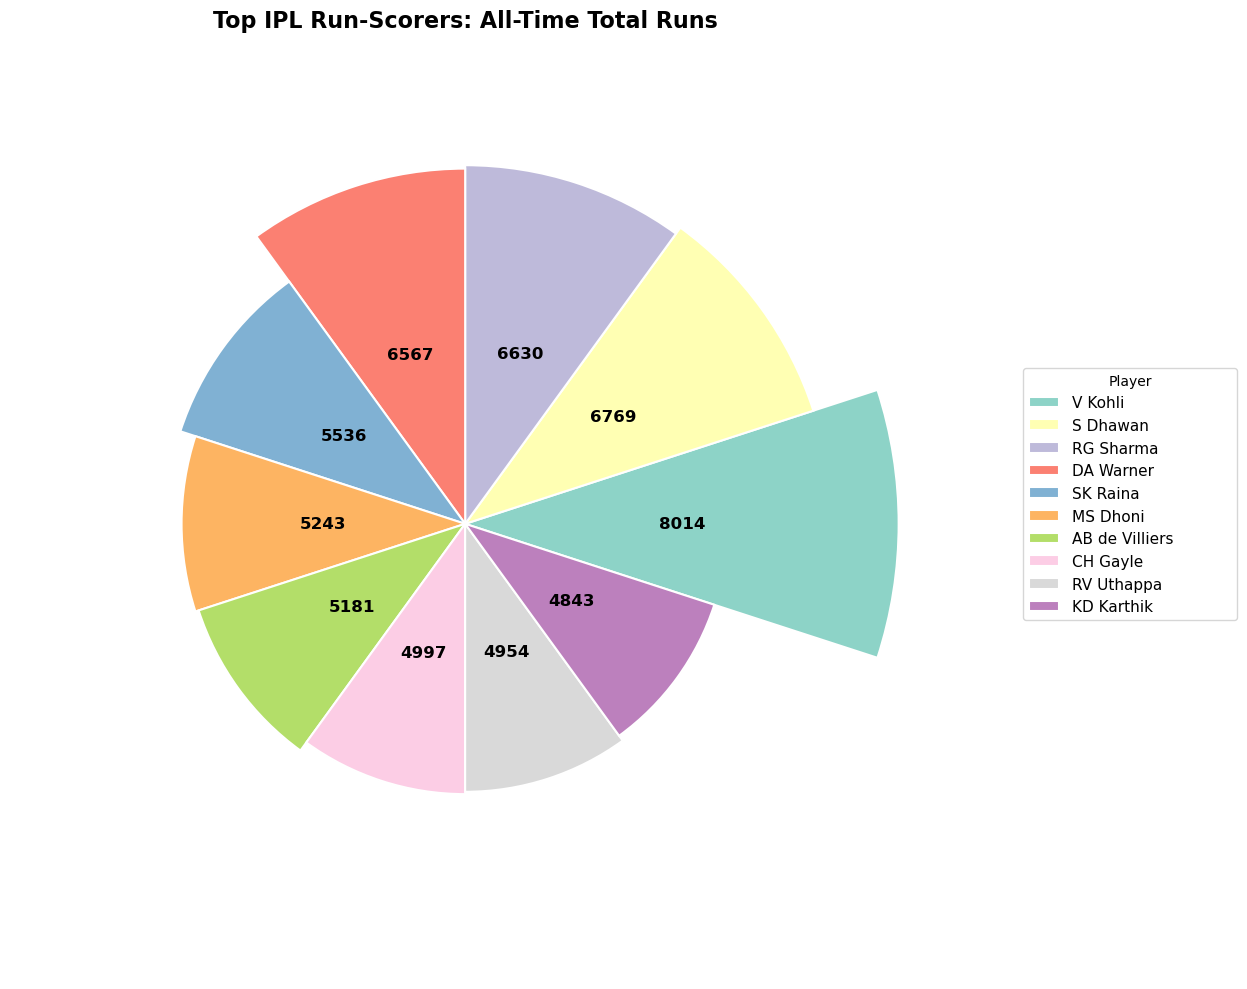

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

history_df = pd.read_csv("/Users/sainihalkonduti/Downloads/Ipl20.csv")
matches_df = pd.read_csv("/Users/sainihalkonduti/Downloads/Updated_Matches.csv")

history_df.columns = history_df.columns.str.strip()
matches_df.columns = matches_df.columns.str.strip()
matches_df['date'] = pd.to_datetime(matches_df['date'], errors='coerce')

merged_df = pd.merge(history_df, matches_df[['id', 'date']], left_on='match_id', right_on='id', how='left')
merged_df['Year'] = merged_df['date'].dt.year

overall_runs = merged_df.groupby('batter')['batsman_runs'].sum().reset_index()
top_scorers = overall_runs.sort_values(by='batsman_runs', ascending=False).head(10)

top_n = 10
players = top_scorers['batter'].tolist()
values = top_scorers['batsman_runs'].tolist()

angles = np.linspace(0, 2 * np.pi, top_n, endpoint=False).tolist()
bar_width = 2 * np.pi / top_n

colors = plt.get_cmap('Set3').colors[:top_n]

fig, ax = plt.subplots(figsize=(10, 10), subplot_kw={'polar': True})
ax.set_facecolor('white')

bars = ax.bar(angles, values, width=bar_width, color=colors, edgecolor='white', linewidth=1.5)

for angle, height in zip(angles, values):
    ax.text(angle, height / 2, str(height), ha='center', va='center', fontsize=12, fontweight='bold', color='black')

ax.set_xticks([])
ax.set_yticks([])
ax.spines['polar'].set_visible(False)

legend_labels = [f"{p}" for p in players]
fig.legend(bars, legend_labels, loc='center left', bbox_to_anchor=(1.05, 0.5), fontsize=11, title="Player")

ax.set_title("Top IPL Run-Scorers: All-Time Total Runs", fontsize=16, fontweight='bold', pad=30)

plt.tight_layout()
plt.show()


In [39]:
import pandas as pd


history_df = pd.read_csv("/Users/sainihalkonduti/Downloads/Ipl20.csv")
matches_df = pd.read_csv("/Users/sainihalkonduti/Downloads/Updated_Matches.csv")


history_df.columns = history_df.columns.str.strip()
matches_df.columns = matches_df.columns.str.strip()
matches_df['date'] = pd.to_datetime(matches_df['date'], errors='coerce')


merged_df = pd.merge(history_df, matches_df[['id', 'date']], left_on='match_id', right_on='id', how='left')
merged_df['Year'] = merged_df['date'].dt.year


runs_per_season = merged_df.groupby(['Year', 'batter'])['batsman_runs'].sum().reset_index()
top_10_each_season = runs_per_season.sort_values(['Year', 'batsman_runs'], ascending=[True, False]).groupby('Year').head(10)


consistent_players = top_10_each_season['batter'].str.strip().value_counts().head(10).index.tolist()


overall_runs = merged_df.groupby('batter')['batsman_runs'].sum().reset_index()
overall_runs['batter'] = overall_runs['batter'].str.strip()
top_scorers = overall_runs.sort_values(by='batsman_runs', ascending=False).head(10)
top_scorers_list = top_scorers['batter'].tolist()


common_players = [player for player in top_scorers_list if player in consistent_players]

print("Common players in both charts (ordered by total runs):")
for player in common_players:
    print(player)



Common players in both charts (ordered by total runs):
V Kohli
S Dhawan
RG Sharma
DA Warner
SK Raina
AB de Villiers
CH Gayle


## 👑 IPL’s Most Consistent Run-Scorers

The players below are not just top run-getters—they've displayed remarkable consistency across multiple IPL seasons. Regardless of their team’s fate, these batters have delivered season after season:

- **Virat Kohli**
- **Shikhar Dhawan**
- **Rohit Sharma**
- **David Warner**
- **Suresh Raina**
- **AB de Villiers**
- **Chris Gayle**



## 🎯 Wicket-Taking Machines – Do Bowlers Win You Titles?

While batters get the limelight, many IPL titles have been won by bowling brilliance. This section explores how consistent top-performing bowlers influence team success.

> A **Violin Plot** visualizes the distribution of wickets per season for key players, showing the spread and density of bowling performances.


In [287]:
import pandas as pd


ipl_data = pd.read_csv("/Users/sainihalkonduti/Downloads/Ipl20.csv")
matches_df = pd.read_csv("/Users/sainihalkonduti/Downloads/Updated_Matches.csv")

ipl_data.columns = ipl_data.columns.str.strip()
matches_df.columns = matches_df.columns.str.strip()


matches_df['date'] = pd.to_datetime(matches_df['date'], errors='coerce')
matches_df['season_year'] = matches_df['date'].dt.year


ipl_data = pd.merge(
    ipl_data,
    matches_df[['id', 'season_year']],
    left_on='match_id',
    right_on='id',
    how='left'
)


valid_wickets = ipl_data[
    (ipl_data['is_wicket'] == 1) &
    (~ipl_data['dismissal_kind'].str.lower().fillna('').str.contains('run out'))
]


bowler_team_season = valid_wickets.groupby(
    ['bowler', 'season_year', 'bowling_team']
)['is_wicket'].count().reset_index(name='wickets')


season_winners = matches_df.sort_values('date').groupby('season_year').tail(1)[['season_year', 'winner']]
season_winners = season_winners.rename(columns={'winner': 'season_winner'})


bowler_team_season = bowler_team_season.merge(season_winners, on='season_year', how='left')


bowler_team_season['won_title'] = bowler_team_season['bowling_team'] == bowler_team_season['season_winner']


top_bowlers = bowler_team_season.groupby('bowler')['wickets'].sum().nlargest(10).index
top_bowler_data = bowler_team_season[bowler_team_season['bowler'].isin(top_bowlers)]


bowler_impact_summary = top_bowler_data.groupby('bowler').agg(
    seasons_played=('season_year', 'nunique'),
    title_winning_seasons=('won_title', 'sum'),
    total_wickets=('wickets', 'sum')
).reset_index()


print(bowler_impact_summary)


                     bowler  seasons_played  title_winning_seasons  \
0  A Mishra                              16                      0   
1  B Kumar                               14                      1   
2  DJ Bravo                              13                      3   
3  JJ Bumrah                             11                      5   
4  PP Chawla                             16                      1   
5  R Ashwin                              15                      2   
6  RA Jadeja                             15                      3   
7  SL Malinga                             9                      4   
8  SP Narine                             13                      3   
9  YS Chahal                             11                      0   

   total_wickets  
0            174  
1            181  
2            183  
3            168  
4            192  
5            181  
6            160  
7            170  
8            180  
9            205  


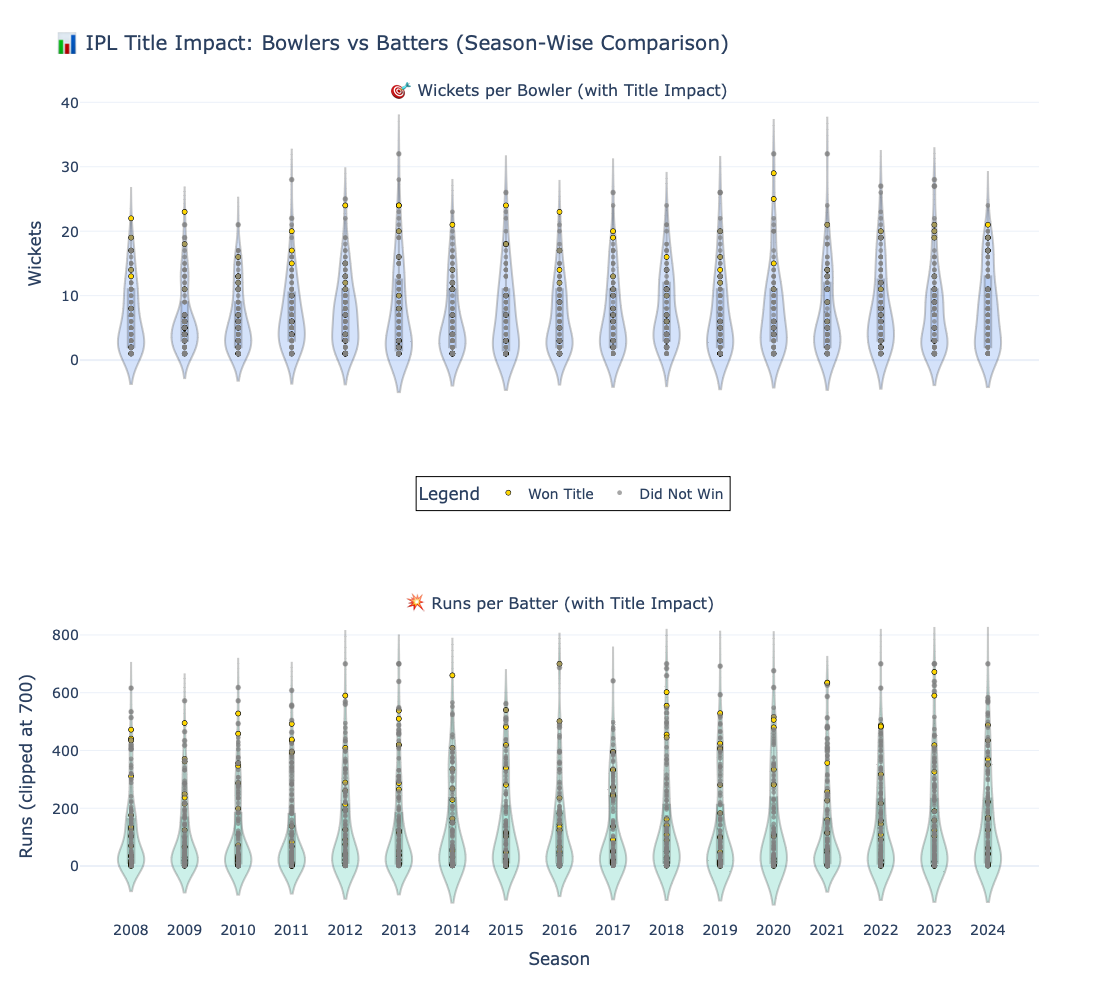

In [289]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go


batter_season_team['runs'] = batter_season_team['runs'].clip(upper=700)


bowler_season_team['season'] = bowler_season_team['season'].astype(str)
batter_season_team['season'] = batter_season_team['season'].astype(str)


winners_bowl = bowler_season_team[bowler_season_team['won_title']]
others_bowl = bowler_season_team[~bowler_season_team['won_title']]
winners_bat = batter_season_team[batter_season_team['won_title']]
others_bat = batter_season_team[~batter_season_team['won_title']]


fig = make_subplots(
    rows=2, cols=1,
    shared_xaxes=True,
    subplot_titles=("🎯 Wickets per Bowler (with Title Impact)", "💥 Runs per Batter (with Title Impact)")
)


for season in sorted(bowler_season_team['season'].unique()):
    sdata = bowler_season_team[bowler_season_team['season'] == season]
    fig.add_trace(go.Violin(
        x=sdata['season'], y=sdata['wickets'],
        box_visible=True, meanline_visible=True,
        line_color='rgba(0,0,0,0.3)', fillcolor='rgba(100,149,237,0.4)',
        opacity=0.7, scalemode='count', showlegend=False
    ), row=1, col=1)

fig.add_trace(go.Scatter(
    x=winners_bowl['season'], y=winners_bowl['wickets'],
    mode='markers', name='Won Title',
    marker=dict(color='gold', size=5, line=dict(color='black', width=0.5)),
    text=[f"{r.bowler}<br>{r.bowling_team}<br>{r.wickets} wickets" for _, r in winners_bowl.iterrows()],
    hoverinfo='text'
), row=1, col=1)

fig.add_trace(go.Scatter(
    x=others_bowl['season'], y=others_bowl['wickets'],
    mode='markers', name='Did Not Win',
    marker=dict(color='gray', size=5, opacity=0.7),
    text=[f"{r.bowler}<br>{r.bowling_team}<br>{r.wickets} wickets" for _, r in others_bowl.iterrows()],
    hoverinfo='text'
), row=1, col=1)


for season in sorted(batter_season_team['season'].unique()):
    sdata = batter_season_team[batter_season_team['season'] == season]
    fig.add_trace(go.Violin(
        x=sdata['season'], y=sdata['runs'],
        box_visible=True, meanline_visible=True,
        line_color='rgba(0,0,0,0.3)', fillcolor='rgba(72,201,176,0.4)',
        opacity=0.7, scalemode='width', showlegend=False
    ), row=2, col=1)

fig.add_trace(go.Scatter(
    x=winners_bat['season'], y=winners_bat['runs'],
    mode='markers', name='Won Title',
    marker=dict(color='gold', size=5, line=dict(color='black', width=0.5)),
    text=[f"{r.batter}<br>{r.batting_team}<br>{r.runs} runs" for _, r in winners_bat.iterrows()],
    hoverinfo='text', showlegend=False
), row=2, col=1)

fig.add_trace(go.Scatter(
    x=others_bat['season'], y=others_bat['runs'],
    mode='markers', name='Did Not Win',
    marker=dict(color='gray', size=5, opacity=0.7),
    text=[f"{r.batter}<br>{r.batting_team}<br>{r.runs} runs" for _, r in others_bat.iterrows()],
    hoverinfo='text', showlegend=False
), row=2, col=1)


fig.update_layout(
    height=1000,
    width=1200,
    title="📊 IPL Title Impact: Bowlers vs Batters (Season-Wise Comparison)",
    font=dict(size=14),
    violinmode='overlay',
    template='plotly_white',
    legend=dict(
        title='Legend',
        orientation='h',
        x=0.35,   # Adjust horizontally (0 to 1)
        y=0.52,   # Vertically between the two subplots
        xanchor='left',
        yanchor='middle',
        bgcolor='rgba(255,255,255,0.7)',
        bordercolor='black',
        borderwidth=1
    )
)

fig.update_yaxes(title_text="Wickets", row=1, col=1)
fig.update_yaxes(title_text="Runs (clipped at 700)", row=2, col=1)
fig.update_xaxes(title_text="Season", row=2, col=1)

# Show plot
fig.show()

### 🎯 Insights: IPL Title Impact – Bowlers vs Batters

- **Bowlers Make the Difference**: Title-winning teams consistently feature bowlers with **higher wicket counts**. The upper range of wicket distributions for champions is significantly higher than for non-winners.

- **Batting is Widespread, Not Always Decisive**: While top batters contribute across all teams, both winners and non-winners include high run scorers. This suggests that **batting alone does not secure titles**.

- **Standout Batting Seasons ≠ Championships**: In 2015, 2016, and 2023, we saw exceptional batting performances (runs clipped at 700), but not all led to title wins. This highlights the **need for balanced squads**.

- **Clustering of Bowling Success**: Winning teams tend to show **tight clusters of high-performing bowlers**, reinforcing that **bowling consistency and impact are sharper differentiators** in championship runs.

🧠 **Takeaway**: Batting wins games, but **bowling wins titles** — a well-rounded bowling unit often tips the scale in playoff and final match scenarios.


## 🧊 Playoff Magic – Heroes or Chokers?

Playoffs are the ultimate test of nerve. This section compares league-stage performance with playoff outcomes to determine who shines—and who stumbles—under pressure.

> A **Box Plot** contrasts league-stage and playoff win percentages.


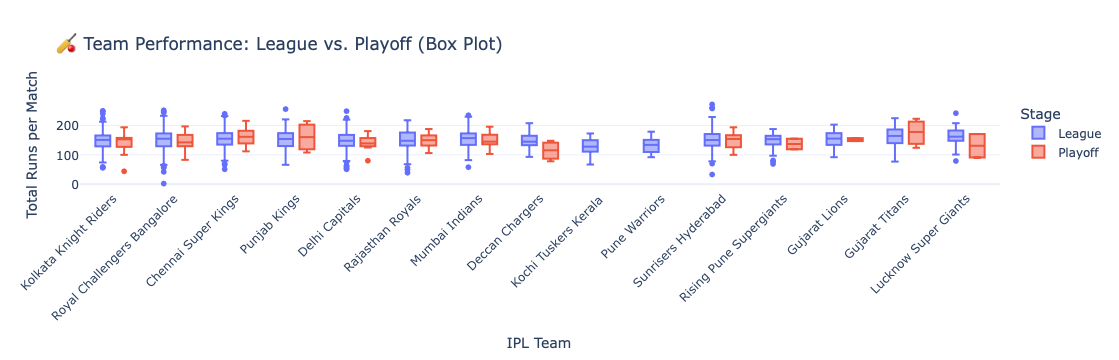

In [291]:
import pandas as pd
import plotly.express as px


matches_df = pd.read_csv("/Users/sainihalkonduti/Downloads/Updated_Matches.csv")
history_df = pd.read_csv("/Users/sainihalkonduti/Downloads/Ipl20.csv")


matches_df.columns = matches_df.columns.str.strip()
history_df.columns = history_df.columns.str.strip()


team_name_mapping = {
    'Kings XI Punjab': 'Punjab Kings',
    'Delhi Daredevils': 'Delhi Capitals',
    'Royal Challengers Bengaluru': 'Royal Challengers Bangalore',
    'Rising Pune Supergiant': 'Rising Pune Supergiants',
    'Rising Pune Supergiants': 'Rising Pune Supergiants'
}

history_df['batting_team'] = history_df['batting_team'].str.strip().replace(team_name_mapping)


matches_df['Stage'] = matches_df['match_type'].apply(
    lambda x: 'League' if str(x).strip().lower() == 'league' else 'Playoff'
)


team_runs = history_df.groupby(['match_id', 'batting_team'])['batsman_runs'].sum().reset_index()
team_runs = team_runs.rename(columns={'batting_team': 'Team', 'batsman_runs': 'Runs'})


merged_df = pd.merge(team_runs, matches_df[['id', 'Stage']], left_on='match_id', right_on='id')


fig = px.box(
    merged_df,
    x="Team",
    y="Runs",
    color="Stage",
    title="🏏 Team Performance: League vs. Playoff (Box Plot)",
    labels={"Runs": "Total Runs per Match", "Team": "IPL Team"},
    template="plotly_white",
    height=600
)

fig.update_layout(xaxis_tickangle=-45)
fig.show()


### 🧠 Insights: Team Performance – League vs. Playoff (Box Plot)

This box plot compares each IPL team's run-scoring behavior in League vs. Playoff stages:

- **Scoring tends to drop in Playoffs** for several teams like Gujarat Titans, Sunrisers Hyderabad, and Royal Challengers Bangalore, indicating pressure or stronger opposition in knockout matches.
- Teams such as **Punjab Kings and Rajasthan Royals** show relatively **higher or consistent playoff scoring**, hinting at clutch performances in key games despite inconsistent league stages.
- **Mumbai Indians and Chennai Super Kings** display tight and stable scoring distributions across both stages, reflecting strategic depth and adaptability in high-stakes matches.
- **Newer franchises** like Lucknow Super Giants and Gujarat Titans show **greater variability** due to limited playoff sample size.
- **Overall, playoff performance is often less explosive**, reinforcing the narrative that bowlers and game pressure play a crucial role in knockout outcomes.


## 📊 Performance vs Popularity

### 🔹 Line Chart with Bubble Markers
Shows if winning more matches leads to a bigger fan base. Correlation between team success and popularity.

### 🔹 Bubble Chart  
Visualizes team performance vs. fan growth. Bubble size shows brand impact—helps spot popular underdogs or dominant fan-favorite teams.


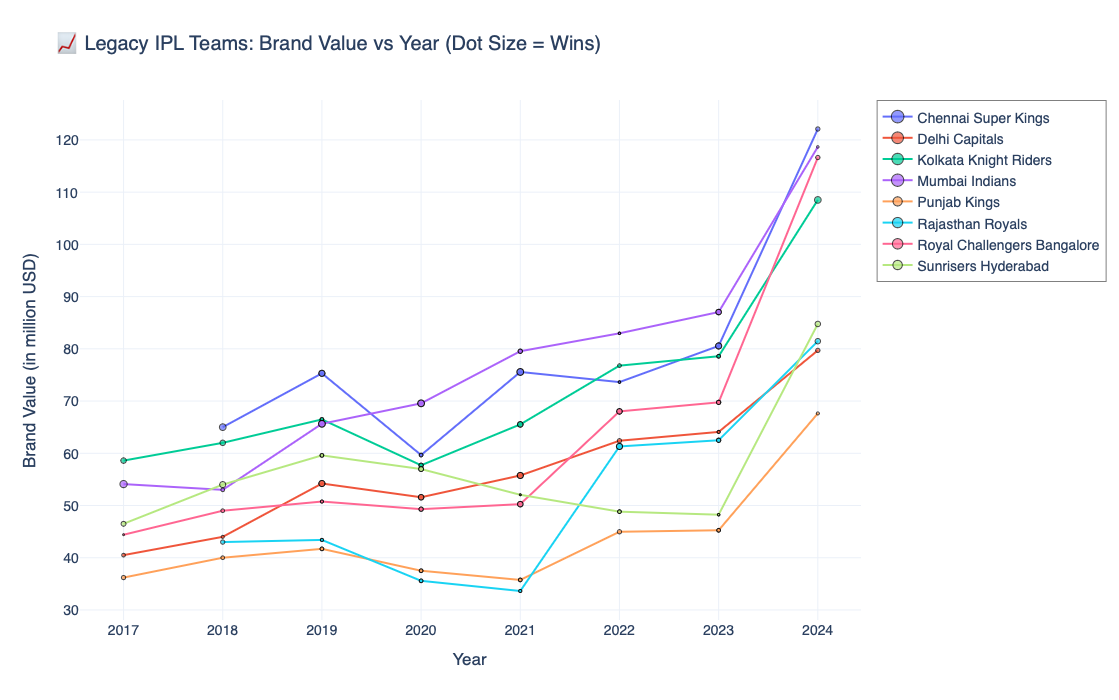

In [293]:
import pandas as pd
import plotly.graph_objects as go


matches_df = pd.read_csv("/Users/sainihalkonduti/Downloads/Updated_Matches.csv")
brand_long_df = pd.read_csv("/Users/sainihalkonduti/Downloads/cleaned_brand_value_long_format.csv")


matches_df.columns = matches_df.columns.str.strip()
matches_df['winner'] = matches_df['winner'].str.strip()
matches_df['date'] = pd.to_datetime(matches_df['date'], errors='coerce')
matches_df['Year'] = matches_df['date'].dt.year
valid_matches = matches_df.dropna(subset=['winner'])
wins = valid_matches.groupby(['winner', 'Year']).size().reset_index(name='Wins')
wins = wins.rename(columns={'winner': 'Team'})
merged = pd.merge(wins, brand_long_df, on=['Team', 'Year'])


legacy_teams = merged['Team'].value_counts()[merged['Team'].value_counts() >= 5].index
legacy_teams = legacy_teams.difference(['Gujarat Titans'])
legacy_df = merged[merged['Team'].isin(legacy_teams)].copy()


fig = go.Figure()

for team in legacy_df['Team'].unique():
    team_data = legacy_df[legacy_df['Team'] == team].copy()
    win_sizes = team_data['Wins'] * 1.5  # Scale dot size

    fig.add_trace(go.Scatter(
        x=team_data['Year'],
        y=team_data['BrandValue'],
        mode='lines+markers',
        name=team,
        marker=dict(
            size=win_sizes.tolist(),
            sizemode='diameter',
            sizeref=2.5,
            line=dict(width=1, color='black')
        ),
        text=team_data['Team'],
        customdata=team_data['Wins'],
        hovertemplate=(
            "<b>%{text}</b><br>" +
            "Year: %{x}<br>" +
            "Brand Value: %{y}M<br>" +
            "Wins: %{customdata}<br>" +
            "<i>(Team: %{text})</i>"
        )
    ))


fig.update_layout(
    title="📈 Legacy IPL Teams: Brand Value vs Year (Dot Size = Wins)",
    xaxis_title="Year",
    yaxis_title="Brand Value (in million USD)",
    template="plotly_white",
    width=1200,
    height=700,
    font=dict(family="Helvetica", size=14),
    xaxis=dict(tickmode='linear', dtick=1),
    legend=dict(bordercolor="gray", borderwidth=1)
)

fig.show()


### 📈 Insights: Legacy IPL Teams – Brand Value vs. Year (2017–2024)

This line chart tracks the brand value of core IPL franchises over time, with **dot size representing the number of wins** in a season:

- **Mumbai Indians and Chennai Super Kings** lead the chart in both brand value and consistent on-field success. Their spikes in brand value often align with strong performances.
- **Royal Challengers Bangalore and Delhi Capitals** show sharp increases post-2021, likely influenced by playoff appearances and stronger squad presence in recent seasons.
- **Punjab Kings and Rajasthan Royals** trail behind in brand value, though both experienced an upward trajectory post-2022—hinting at renewed team strategies or fan engagement.
- **Sunrisers Hyderabad** show fluctuation, with a notable rise in 2024 despite inconsistent recent performances—possibly due to off-field marketing or new ownership dynamics.
- Brand value trends seem closely tied to **performance momentum and public visibility**, though **wins aren’t the sole factor**, as seen in cases like RCB.

This visualization underscores how **on-field success boosts commercial worth**, but legacy, fan base, and brand positioning also play vital roles in valuation.


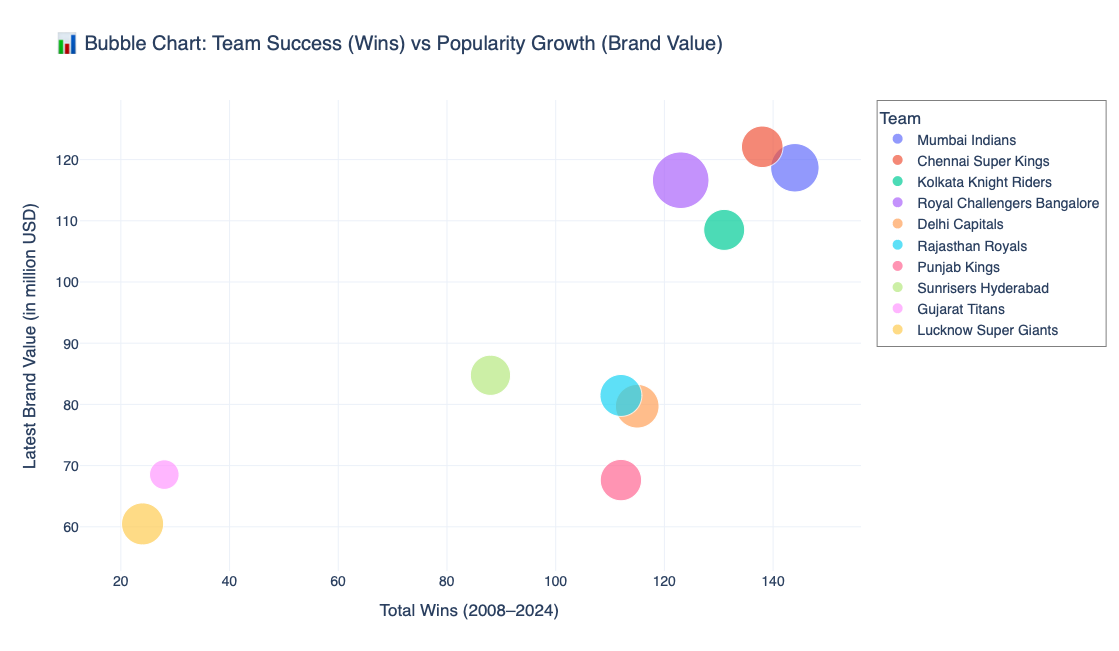

In [295]:
import pandas as pd
import plotly.express as px


matches_df = pd.read_csv("/Users/sainihalkonduti/Downloads/Updated_Matches.csv")
brand_long_df = pd.read_csv("/Users/sainihalkonduti/Downloads/cleaned_brand_value_long_format.csv")


matches_df.columns = matches_df.columns.str.strip()
matches_df['winner'] = matches_df['winner'].str.strip()


total_wins = matches_df['winner'].value_counts().reset_index()
total_wins.columns = ['Team', 'TotalWins']

brand_df = brand_long_df.copy()
brand_df = brand_df.sort_values(by=['Team', 'Year'])


growth_df = brand_df.groupby('Team').agg(
    FirstYearValue=('BrandValue', 'first'),
    LastYearValue=('BrandValue', 'last')
).reset_index()
growth_df['GrowthPercent'] = ((growth_df['LastYearValue'] - growth_df['FirstYearValue']) / growth_df['FirstYearValue']) * 100
growth_df = growth_df[growth_df['FirstYearValue'] > 0]  # avoid divide-by-zero


bubble_df = pd.merge(total_wins, growth_df, on='Team', how='inner')


fig = px.scatter(
    bubble_df,
    x="TotalWins",
    y="LastYearValue",
    size="GrowthPercent",
    color="Team",
    hover_data=["Team", "TotalWins", "GrowthPercent", "LastYearValue"],
    title="📊 Bubble Chart: Team Success (Wins) vs Popularity Growth (Brand Value)",
    size_max=40,
    template="plotly_white"
)

fig.update_layout(
    xaxis_title="Total Wins (2008–2024)",
    yaxis_title="Latest Brand Value (in million USD)",
    font=dict(family="Helvetica", size=14),
    legend=dict(bordercolor="gray", borderwidth=1),
    width=1100,
    height=650
)

fig.show()


### 📊 Insights: Team Success vs. Popularity Growth (Bubble Chart)

This bubble chart maps **Total Wins (2008–2024)** on the x-axis against **Latest Brand Value** on the y-axis, with **bubble size indicating popularity growth**:

- **Mumbai Indians and Chennai Super Kings** dominate both in total wins and brand value, confirming their dual strength in performance and commercial appeal.
- **Royal Challengers Bangalore**, despite fewer titles, boast a **high brand value and large bubble**, showing the power of a strong fanbase and brand engagement.
- **Delhi Capitals and Kolkata Knight Riders** also exhibit a strong correlation between on-field consistency and commercial recognition.
- **Sunrisers Hyderabad** and **Rajasthan Royals** fall mid-range—solid win counts but moderate brand value, indicating room for marketing leverage.
- **Newer franchises like Gujarat Titans and Lucknow Super Giants** have relatively **high brand value despite fewer wins**, suggesting early hype, fresh branding, and newer fan engagement strategies.
- **Punjab Kings**, despite a long history, remain low on both metrics, reflecting underachievement in both sport and branding.

🧠 **Takeaway**: While success fuels brand value, **fan loyalty, visibility, and marketing** can elevate teams like RCB and GT even without consistent titles.


## 🔥 One-Sided Rivalries – Heatmap

This heatmap highlights **one-sided matchups** in IPL history, showing teams that consistently dominate or struggle against specific opponents.  
Darker cells indicate higher win margins or frequent losses, revealing intense rivalries and persistent underperformance patterns.


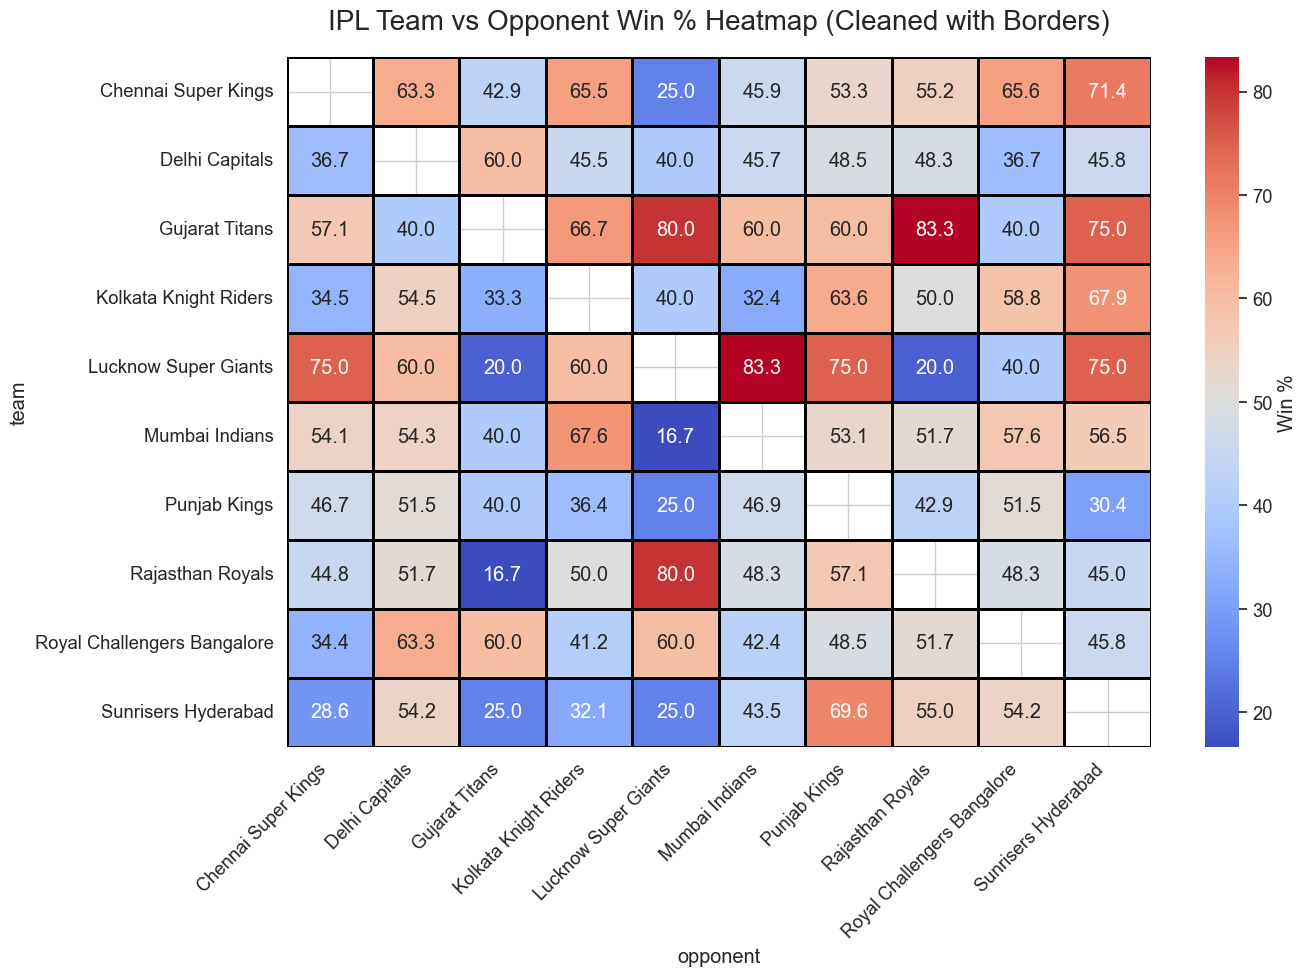

In [297]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


matches = pd.read_csv('/Users/sainihalkonduti/Downloads/matches.csv')
matches.columns = matches.columns.str.strip()


team_name_corrections = {
    'Kings XI Punjab': 'Punjab Kings',
    'Royal Challengers Bengaluru': 'Royal Challengers Bangalore',
    'Royal Challengers Bangalore': 'Royal Challengers Bangalore',
    'Delhi Daredevils': 'Delhi Capitals',
    'Rising Pune Supergiants': 'Rising Pune Supergiant',
    'Rising Pune Supergiant': 'Rising Pune Supergiant'
}

for col in ['team1', 'team2', 'winner']:
    matches[col] = matches[col].replace(team_name_corrections)


matches = matches[matches['winner'].notna()]


data = []

for idx, row in matches.iterrows():
    team1 = row['team1']
    team2 = row['team2']
    winner = row['winner']

    if team1 != team2:  # Ignore same-team
        data.append({'team': team1, 'opponent': team2, 'won': int(winner == team1)})
        data.append({'team': team2, 'opponent': team1, 'won': int(winner == team2)})

df = pd.DataFrame(data)


team_vs_opponent = df.groupby(['team', 'opponent']).agg(
    matches_played=('won', 'count'),
    matches_won=('won', 'sum')
).reset_index()

team_vs_opponent['win_percentage'] = (team_vs_opponent['matches_won'] / team_vs_opponent['matches_played']) * 100


heatmap_data = team_vs_opponent.pivot(index='team', columns='opponent', values='win_percentage')


mask = heatmap_data.copy()
for team in heatmap_data.index:
    if team in heatmap_data.columns:
        mask.loc[team, team] = np.nan


defunct_teams = ['Deccan Chargers', 'Kochi Tuskers Kerala', 'Pune Warriors', 'Rising Pune Supergiant', 'Gujarat Lions']
mask = mask.drop(index=defunct_teams, errors='ignore')
mask = mask.drop(columns=defunct_teams, errors='ignore')


plt.figure(figsize=(14, 10))
sns.heatmap(
    mask, 
    annot=True, 
    fmt=".1f", 
    cmap='coolwarm', 
    linewidths=1.0,  # ✅ thick borders
    linecolor='black',  # ✅ black borders
    cbar_kws={'label': 'Win %'}, 
    mask=mask.isnull()
)
plt.title('IPL Team vs Opponent Win % Heatmap (Cleaned with Borders)', fontsize=20, pad=20)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


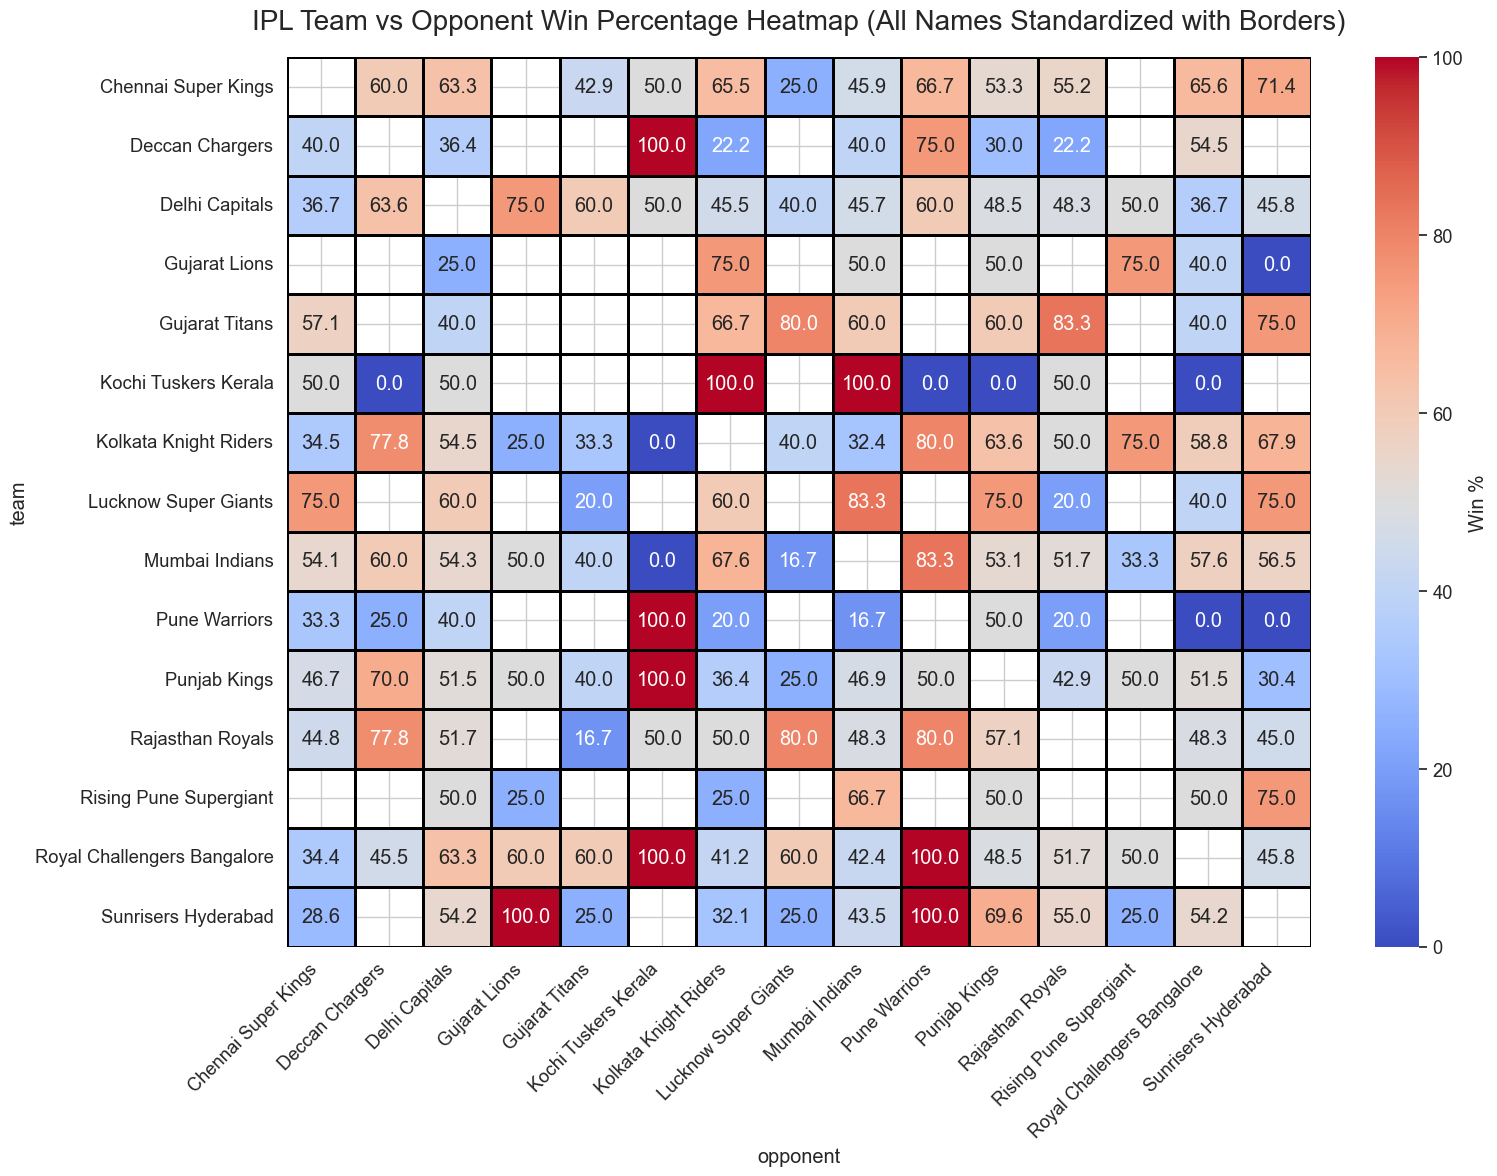

In [299]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


matches = pd.read_csv('/Users/sainihalkonduti/Downloads/matches.csv')
matches.columns = matches.columns.str.strip()


team_name_corrections = {
    'Kings XI Punjab': 'Punjab Kings',
    'Royal Challengers Bengaluru': 'Royal Challengers Bangalore',
    'Royal Challengers Bangalore': 'Royal Challengers Bangalore',
    'Delhi Daredevils': 'Delhi Capitals',
    'Rising Pune Supergiants': 'Rising Pune Supergiant',
    'Rising Pune Supergiant': 'Rising Pune Supergiant'
}

for col in ['team1', 'team2', 'winner']:
    matches[col] = matches[col].replace(team_name_corrections)


matches = matches[matches['winner'].notna()]


data = []

for idx, row in matches.iterrows():
    team1 = row['team1']
    team2 = row['team2']
    winner = row['winner']

    if team1 != team2:  # Ignore ties if any
        data.append({'team': team1, 'opponent': team2, 'won': int(winner == team1)})
        data.append({'team': team2, 'opponent': team1, 'won': int(winner == team2)})

df = pd.DataFrame(data)


team_vs_opponent = df.groupby(['team', 'opponent']).agg(
    matches_played=('won', 'count'),
    matches_won=('won', 'sum')
).reset_index()


team_vs_opponent['win_percentage'] = (team_vs_opponent['matches_won'] / team_vs_opponent['matches_played']) * 100


heatmap_data = team_vs_opponent.pivot(index='team', columns='opponent', values='win_percentage')


plt.figure(figsize=(16, 12))
sns.heatmap(
    heatmap_data,
    annot=True,
    fmt=".1f",
    cmap='coolwarm',
    linewidths=1.0,   # ✅ thicker lines
    linecolor='black', # ✅ black borders
    cbar_kws={'label': 'Win %'}
)
plt.title('IPL Team vs Opponent Win Percentage Heatmap (All Names Standardized with Borders)', fontsize=20, pad=20)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


### 🔥 Insights: IPL Team vs Opponent – Win Percentage Heatmap

This heatmap shows how each IPL team has performed against every other team in terms of **win percentage**:

- **One-sided rivalries** stand out with deep reds (≥75%) or blues (≤25%):
  - **Sunrisers Hyderabad** have dominated **Delhi Capitals** and **RCB** (100%).
  - **Kolkata Knight Riders** consistently outperform **Punjab Kings** (83.0%) and **Delhi Capitals** (77.8%).
  - **Rajasthan Royals** also enjoy strong records vs. **DC** (77.8%) and **KKR** (80.0%).

- **Balanced rivalries** include:
  - **Mumbai Indians vs CSK** (54.1%) and **RCB vs MI** (48.5%)—suggesting high competition between top-tier franchises.
  - **CSK vs MI, RCB, and DC** show near-even splits, making for classic matchups.

- **Newer teams like Gujarat Titans and LSG** have mixed early records:
  - **GT** dominates **RR** (80%) and **SRH** (75%) early on.
  - **LSG** has strong starts vs **DC** (75%) but struggles vs **MI** and **RCB** (20%).

- **Teams with poor head-to-head records**:
  - **Punjab Kings** and **Sunrisers** show several blue cells, indicating consistent underperformance against multiple franchises.

🧠 **Takeaway**: This matrix highlights long-standing dominance, evolving rivalries, and emerging team trends—critical for analyzing IPL dynamics beyond overall stats.


### 🏆 Which Teams Have Dominated the IPL, and Why?
To analyze IPL team dominance, we utilize a diverse set of visualizations:

- **Bar Chart: Total Wins by IPL Teams (2008–2024)**  
  Highlights the most successful teams in terms of match victories, with Mumbai Indians and Chennai Super Kings leading the tally.

- **Facet Bar Charts: Win % by Season (Teams with >10 Seasons)**  
  Shows season-wise consistency of long-standing franchises, revealing which teams sustain high performance across years and which fluctuate.

- **Treemap: Player Retention (5+ Seasons)**  
  Visualizes how many players each team has retained long-term. Stronger teams like CSK and MI have retained large, stable cores, hinting at the value of continuity in success.

- **King of Runs Chart** *(not shown here)*  
  Focuses on individual batting dominance, emphasizing how players like Virat Kohli have consistently topped run-scoring charts regardless of team titles.


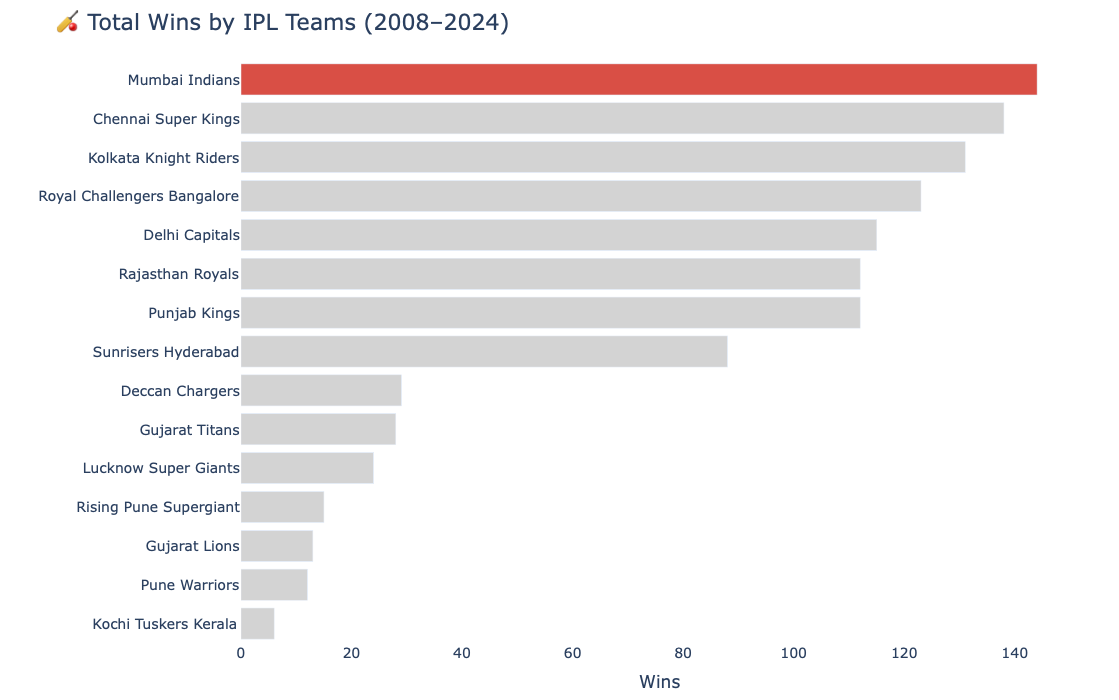

In [301]:
import pandas as pd
import plotly.express as px


matches = pd.read_csv("/Users/sainihalkonduti/Downloads/Updated_Matches.csv")
matches.columns = matches.columns.str.strip()


team_name_corrections = {
    'Kings XI Punjab': 'Punjab Kings',
    'Royal Challengers Bengaluru': 'Royal Challengers Bangalore',
    'Royal Challengers Bangalore': 'Royal Challengers Bangalore',
    'Delhi Daredevils': 'Delhi Capitals',
    'Rising Pune Supergiants': 'Rising Pune Supergiant',
    'Rising Pune Supergiant': 'Rising Pune Supergiant'
}
for col in ['team1', 'team2', 'winner']:
    matches[col] = matches[col].replace(team_name_corrections)


wins = matches['winner'].value_counts().reset_index()
wins.columns = ['team', 'wins']
team1_counts = matches['team1'].value_counts()
team2_counts = matches['team2'].value_counts()
matches_played = (team1_counts + team2_counts).reset_index()
matches_played.columns = ['team', 'matches_played']


performance = pd.merge(wins, matches_played, on='team', how='outer').fillna(0)
performance['win_percentage'] = (performance['wins'] / performance['matches_played']) * 100
performance = performance.sort_values(by="wins", ascending=True)


highlight_team = performance.iloc[-1]['team']
performance['color'] = performance['team'].apply(
    lambda x: '#d94f45' if x == highlight_team else 'lightgray'
)


fig = px.bar(
    performance,
    x='wins',
    y='team',
    orientation='h',
    title='🏏 Total Wins by IPL Teams (2008–2024)',
)

fig.update_traces(
    marker_color=performance['color']
)

fig.update_layout(
    height=700, width=900,
    plot_bgcolor='white',
    paper_bgcolor='white',
    font=dict(size=14),
    title_font=dict(size=22),
    xaxis=dict(title='Wins', showgrid=False),
    yaxis=dict(title='', showgrid=False),
    margin=dict(l=150, r=40, t=60, b=40),
    showlegend=False
)

fig.show()


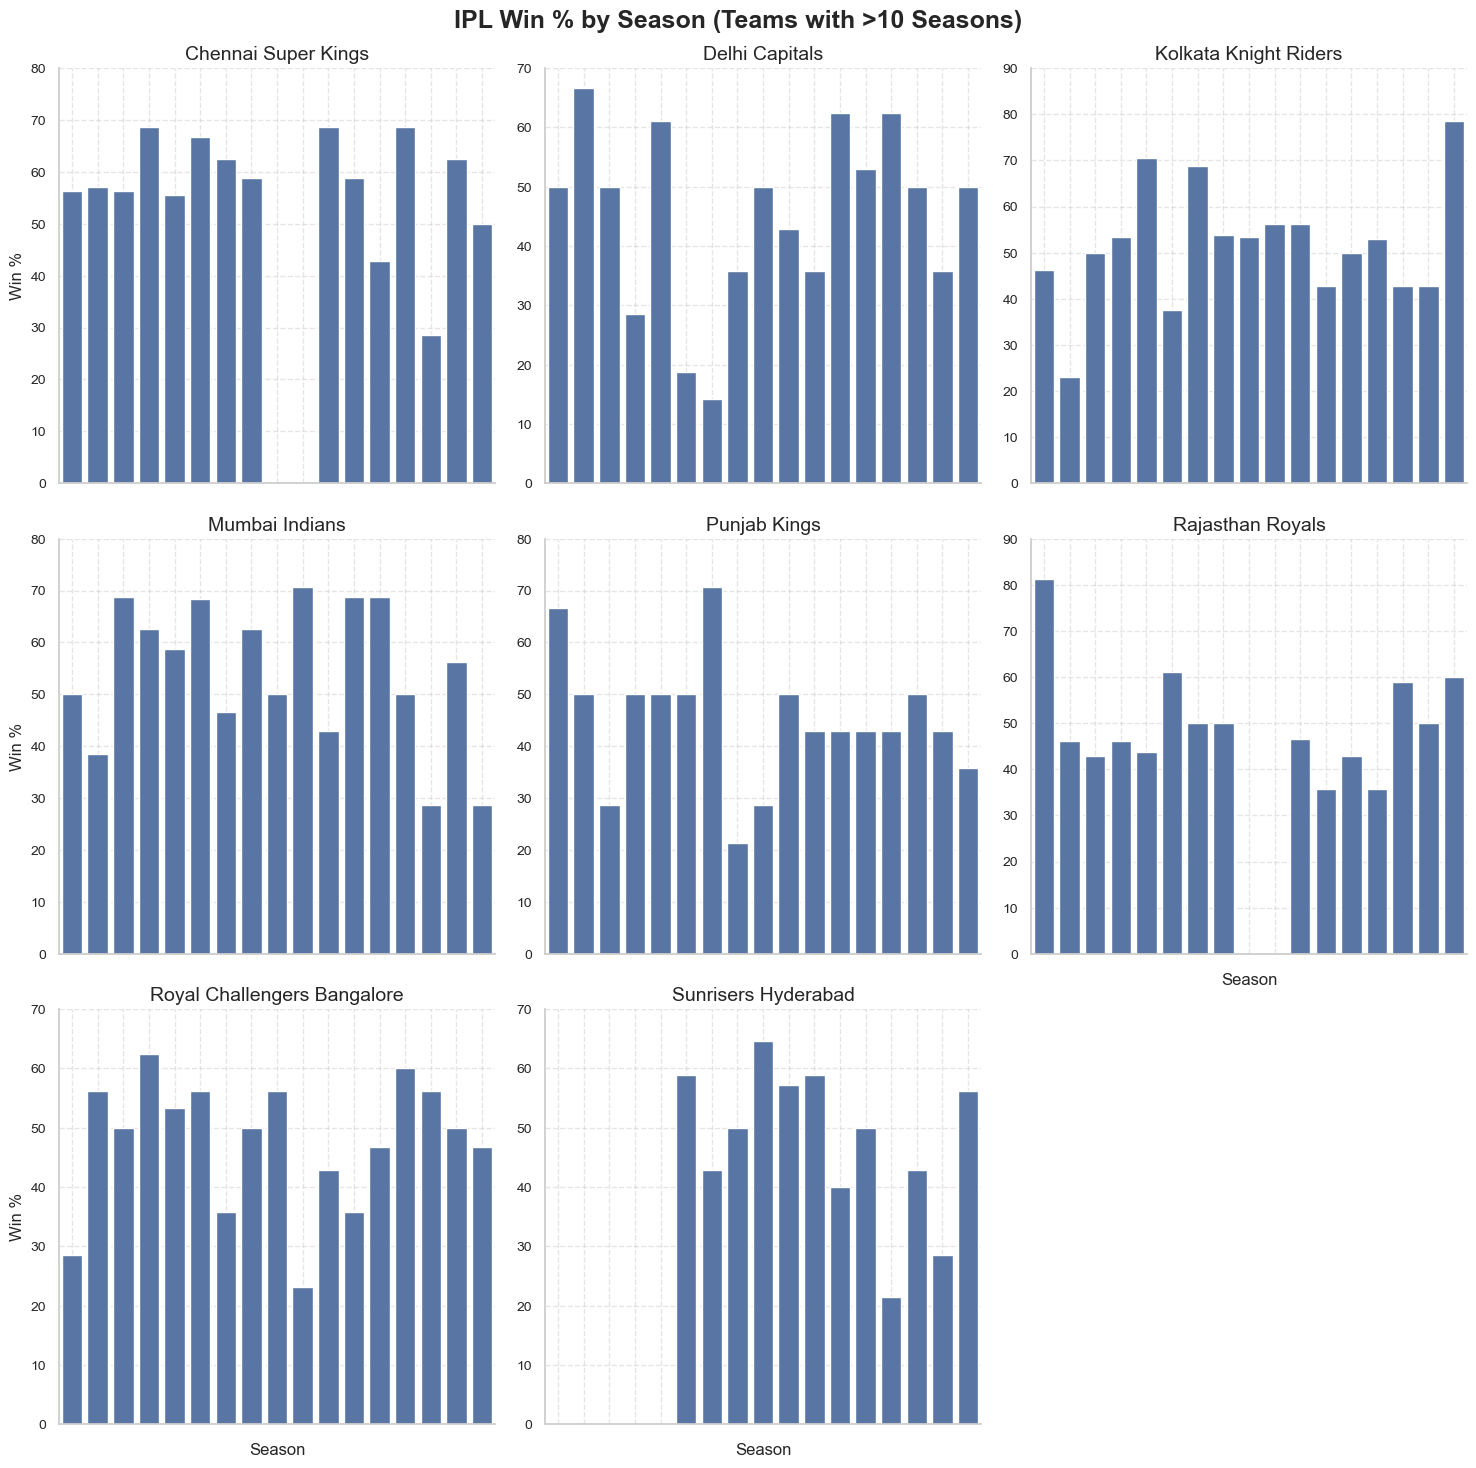

In [303]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


matches_df = pd.read_csv('/Users/sainihalkonduti/Downloads/Updated_Matches.csv')
matches_df.columns = matches_df.columns.str.strip()


long_df = pd.melt(
    matches_df,
    id_vars=["season", "winner"],
    value_vars=["team1", "team2"],
    var_name="role",
    value_name="team"
)


matches_played = long_df.groupby(['season', 'team']).size().reset_index(name='Matches_Played')


wins = matches_df.groupby(['season', 'winner']).size().reset_index(name='Wins')
wins = wins.rename(columns={'winner': 'team'})


team_stats = pd.merge(matches_played, wins, on=['season', 'team'], how='left').fillna(0)
team_stats['Win_Percent'] = (team_stats['Wins'] / team_stats['Matches_Played']) * 100
team_stats['season'] = team_stats['season'].astype(str).str.strip()


season_counts = team_stats.groupby('team')['season'].nunique().reset_index(name='Season_Count')
long_term_teams = season_counts[season_counts['Season_Count'] > 10]['team'].tolist()
filtered_stats = team_stats[team_stats['team'].isin(long_term_teams)]


sns.set(style="whitegrid", font_scale=1.2)


g = sns.FacetGrid(filtered_stats, col="team", col_wrap=3, height=5, sharey=False)
g.map_dataframe(sns.barplot, x="season", y="Win_Percent", order=sorted(filtered_stats['season'].unique()))


g.set_titles("{col_name}", size=14)
g.set_axis_labels("Season", "Win %", size=12)
g.set_xticklabels(rotation=45, size=10)
g.set_yticklabels(size=10)


for ax in g.axes.flatten():
    ax.grid(True, linestyle='--', alpha=0.5)


plt.subplots_adjust(top=0.9)
g.fig.suptitle("IPL Win % by Season (Teams with >10 Seasons)", fontsize=18, weight='bold')
plt.tight_layout()


plt.show()


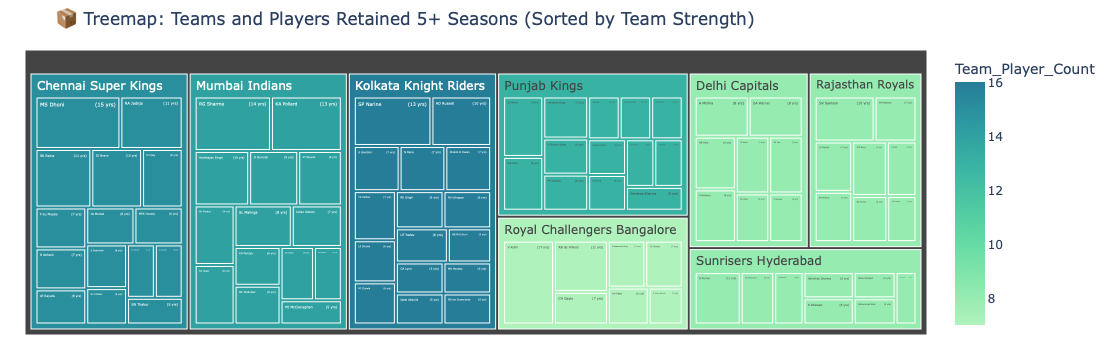

In [305]:
import pandas as pd
import plotly.express as px


matches_df = pd.read_csv('/Users/sainihalkonduti/Downloads/Updated_Matches.csv')
history_df = pd.read_csv('/Users/sainihalkonduti/Downloads/Ipl20.csv')


matches_df.columns = matches_df.columns.str.strip()
history_df.columns = history_df.columns.str.strip()


team_name_mapping = {
    'Kings XI Punjab': 'Punjab Kings',
    'Delhi Daredevils': 'Delhi Capitals',
    'Royal Challengers Bengaluru': 'Royal Challengers Bangalore',
    'Rising Pune Supergiant': 'Rising Pune Supergiants',
    'Rising Pune Supergiants': 'Rising Pune Supergiants'
}
history_df['batting_team'] = history_df['batting_team'].str.strip().replace(team_name_mapping)


history_with_season = pd.merge(
    history_df,
    matches_df[['id', 'season']],
    left_on='match_id',
    right_on='id',
    how='left'
)


history_with_season = history_with_season[['season', 'batting_team', 'batter']].dropna()
history_with_season['season'] = history_with_season['season'].astype(str).str.strip()


player_season_map = history_with_season.drop_duplicates().groupby(['batting_team', 'batter'])['season'].apply(set).reset_index()
player_season_map['num_seasons'] = player_season_map['season'].apply(len)


retained_5yr_plus = player_season_map[player_season_map['num_seasons'] >= 5]


team_retention_count = retained_5yr_plus.groupby('batting_team').size().reset_index(name='Players_5yr+')


treemap_data = retained_5yr_plus.merge(team_retention_count, on='batting_team')


treemap_data.columns = ['Team', 'Player', 'Seasons', 'Num_Seasons', 'Team_Player_Count']


treemap_data['Player_Label'] = treemap_data['Player'] + ' (' + treemap_data['Num_Seasons'].astype(str) + ' yrs)'


treemap_data = treemap_data.sort_values(by=['Team_Player_Count', 'Num_Seasons'], ascending=[False, False])


fig = px.treemap(
    treemap_data,
    path=['Team', 'Player_Label'],
    values='Num_Seasons',
    color='Team_Player_Count',
    color_continuous_scale='Tealgrn',
    title='📦 Treemap: Teams and Players Retained 5+ Seasons (Sorted by Team Strength)',
    template='plotly_white'
)

fig.update_layout(margin=dict(t=50, l=25, r=25, b=25))
fig.show()


### Insights

**Mumbai Indians** and **Chennai Super Kings** have clearly dominated the IPL in terms of total wins, consistent season-wise performance, and squad continuity. Mumbai leads in overall wins (2008–2024), while CSK shows exceptional win percentages across multiple seasons.

What drives this dominance?

- 🔁 **Stability in Core Squad**: Teams like CSK and MI have retained key players for long durations (e.g., MS Dhoni – 15 years, Rohit Sharma – 14 years), building deep team chemistry.
- 📈 **Consistent Performance**: Both teams maintained high win percentages season after season, reflecting adaptability and resilience.
- 🔥 **Star Power and Leadership**: Leadership from Dhoni and Rohit, along with supporting veterans (Jadeja, Pollard, Bumrah), created winning cultures.
- 🧱 **Retention Strategy**: As seen in the treemap, top teams have invested in retaining their best players (5+ seasons), unlike teams like Punjab or Delhi which saw more rotation.

Additionally, **Virat Kohli** stands out as the undisputed **King of Runs**, being the most consistent top scorer across seasons, though his team (RCB) has not mirrored that individual dominance in titles.


### 📈 How Does Team Performance Vary Across Seasons, and What Trends Can Be Observed?

IPL team performance is shaped by shifting squads, leadership, auctions, and momentum. The following charts offer a multi-dimensional view of how teams have fared over the years.

---

### 📊 Chart Descriptions:

- **Sunburst Chart: Team vs Opponent Wins**  
  Shows team-wise victories split by opponent, helping identify which teams consistently dominate specific rivals across seasons.

- **Lollipop Chart: Playoff Win Percentage by Team**  
  Highlights how well each team performs in high-pressure playoff scenarios. It's a clean comparison of clutch performance beyond just reaching the playoffs.

---


/var/folders/6n/r3q3rg4s2_9bpln0zbw7x0kh0000gn/T/ipykernel_43191/2183327564.py:19: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



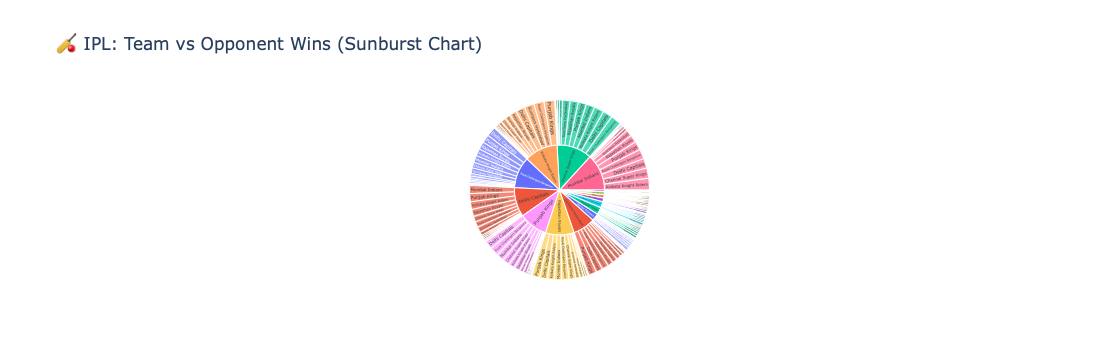

In [307]:

import pandas as pd
import plotly.express as px


matches = pd.read_csv('/Users/sainihalkonduti/Downloads/Updated_Matches.csv')


matches_cleaned = matches.dropna(subset=['winner'])


def get_opponent(row):
    if row['team1'] == row['winner']:
        return row['team2']
    elif row['team2'] == row['winner']:
        return row['team1']
    else:
        return None  # Shouldn't happen if winner is either team1 or team2

matches_cleaned['opponent'] = matches_cleaned.apply(get_opponent, axis=1)


team_vs_opponent = matches_cleaned.groupby(['winner', 'opponent']).size().reset_index(name='wins')


fig = px.sunburst(
    team_vs_opponent,
    path=['winner', 'opponent'],
    values='wins',
    color='winner',
    title='🏏 IPL: Team vs Opponent Wins (Sunburst Chart)',
    height=650
)

fig.show()

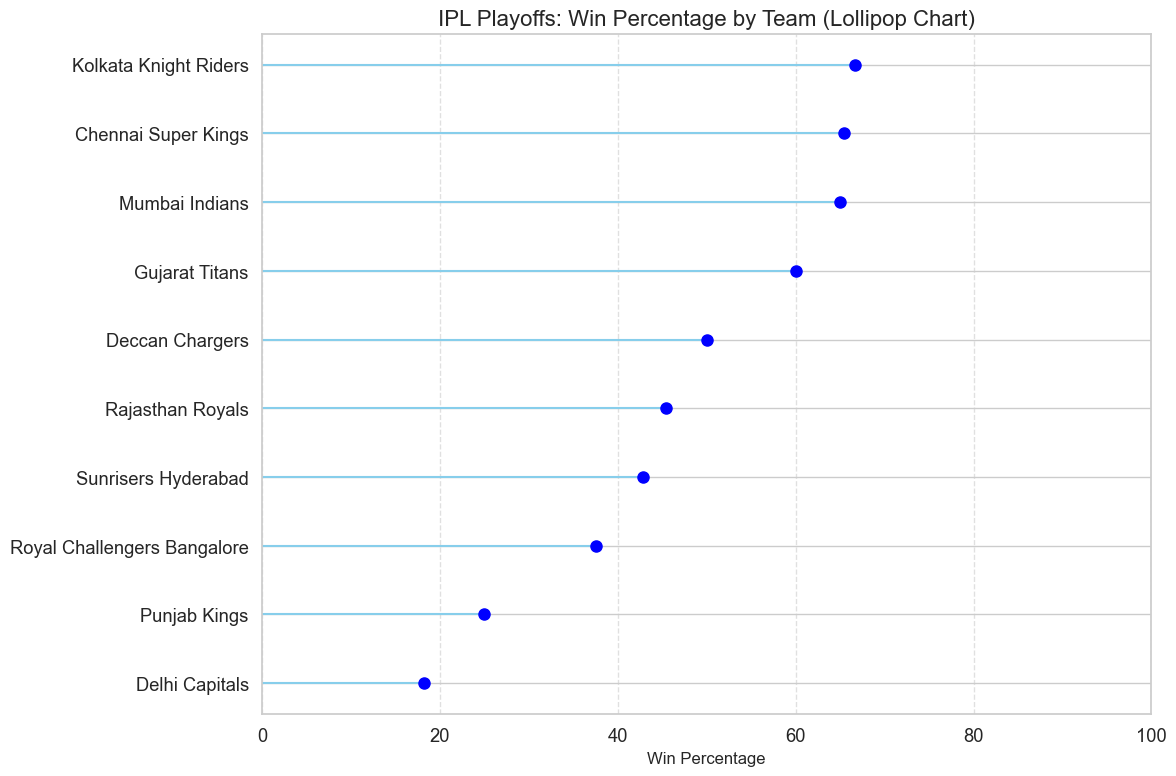

In [309]:
import pandas as pd
import matplotlib.pyplot as plt

matches_df = pd.read_csv("/Users/sainihalkonduti/Downloads/Updated_Matches.csv")


matches_df['Stage'] = matches_df['match_type'].apply(
    lambda x: 'League' if str(x).strip().lower() == 'league' else 'Playoff'
)


playoff_matches = matches_df[matches_df['Stage'] == 'Playoff']


wins_df = playoff_matches['winner'].value_counts().reset_index()
wins_df.columns = ['Team', 'Wins']


appearances_df = pd.concat([
    playoff_matches[['team1']].rename(columns={'team1': 'Team'}),
    playoff_matches[['team2']].rename(columns={'team2': 'Team'})
])
appearances_df = appearances_df['Team'].value_counts().reset_index()
appearances_df.columns = ['Team', 'Appearances']


playoff_stats = pd.merge(appearances_df, wins_df, on='Team', how='left').fillna(0)
playoff_stats['Win_Percent'] = (playoff_stats['Wins'] / playoff_stats['Appearances']) * 100


playoff_stats = playoff_stats[playoff_stats['Appearances'] >= 3]


playoff_stats_sorted = playoff_stats.sort_values(by='Win_Percent', ascending=True)


plt.figure(figsize=(12, 8))
plt.hlines(
    y=playoff_stats_sorted['Team'],
    xmin=0,
    xmax=playoff_stats_sorted['Win_Percent'],
    color='skyblue'
)
plt.plot(
    playoff_stats_sorted['Win_Percent'],
    playoff_stats_sorted['Team'],
    "o",
    markersize=8,
    color='blue'
)


plt.title("IPL Playoffs: Win Percentage by Team (Lollipop Chart)", fontsize=16)
plt.xlabel("Win Percentage", fontsize=12)
plt.xlim(0, 100)
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()




### 🔍 Key Insights:

- 🥇 **Mumbai Indians and CSK** not only accumulate the most wins but have a **balanced edge across most opponents**, showing all-round dominance rather than isolated rivalries.
  
- 📌 **KKR has the highest playoff win percentage**, reflecting their ability to peak at the right time even if their league performance is inconsistent.
  
- ⚠️ **Delhi Capitals and Punjab Kings** show a major drop-off in playoffs, with **under 25% win rates**, suggesting inability to convert league-stage momentum into final stage victories.
  
- 📊 **RCB**, despite strong individual players and frequent playoff qualifications, underperform in crunch matches—indicative of high variance across seasons.

- 🔄 Newer teams like **Gujarat Titans** start strong in playoffs but lack long-term trend data. Older franchises show clear performance cycles.

---

### 🧠 Takeaway:

Team performance in the IPL is highly cyclical—while some teams maintain consistency across years (MI, CSK), others like RCB and DC fluctuate heavily. Clutch performance in playoffs and the ability to dominate specific opponents often separates the title contenders from the rest.


### 🗺️ IPL Geography – Mapping Team Wins Across Indian Cities

This interactive map visualizes **IPL team victories by city**, showing where each franchise has historically dominated. Each circle represents a city where IPL matches have been played, with:
- **Size indicating the number of wins** by teams in that city.
- **Color representing different teams**.
- **Hover-enabled popups** to view team-wise win distribution per location.

This geographic perspective helps identify **fortresses like Mumbai and Chennai**, as well as neutral or rotating venues that have hosted multiple teams.


In [311]:
import pandas as pd
import folium
from folium.plugins import MarkerCluster
import random


matches = pd.read_csv('/Users/sainihalkonduti/Downloads/Updated_Matches.csv')


city_coords = {
    'Mumbai': (19.0760, 72.8777),
    'Chennai': (13.0827, 80.2707),
    'Delhi': (28.6139, 77.2090),
    'Kolkata': (22.5726, 88.3639),
    'Bangalore': (12.9716, 77.5946),
    'Hyderabad': (17.3850, 78.4867),
    'Ahmedabad': (23.0225, 72.5714),
    'Jaipur': (26.9124, 75.7873),
    'Mohali': (30.7046, 76.7179),
    'Pune': (18.5204, 73.8567),
    'Raipur': (21.2514, 81.6296),
    'Ranchi': (23.3441, 85.3096),
    'Dharamsala': (32.2190, 76.3234),
    'Visakhapatnam': (17.6868, 83.2185),
    'Cuttack': (20.4625, 85.8828),
    'Indore': (22.7196, 75.8577),
    'Nagpur': (21.1458, 79.0882),
}


matches = matches[matches['city'].isin(city_coords.keys())]


team_city_wins = matches.dropna(subset=['winner']).groupby(['city', 'winner']).size().reset_index(name='wins')
team_city_wins['lat'] = team_city_wins['city'].map(lambda x: city_coords[x][0])
team_city_wins['lon'] = team_city_wins['city'].map(lambda x: city_coords[x][1])


teams = team_city_wins['winner'].unique()
team_colors = {team: f"#{random.randint(0, 0xFFFFFF):06x}" for team in teams}

india_map = folium.Map(location=[22.9734, 78.6569], zoom_start=5.1, tiles='CartoDB positron')


marker_cluster = MarkerCluster().add_to(india_map)


for _, row in team_city_wins.iterrows():
    folium.CircleMarker(
        location=[row['lat'], row['lon']],
        radius=max(3, row['wins'] / 2),
        color=team_colors.get(row['winner'], 'blue'),
        fill=True,
        fill_opacity=0.6,
        popup=f"{row['winner']} - {row['city']}: {row['wins']} wins"
    ).add_to(marker_cluster)


india_map.save("ipl_team_wins_india_map.html")
india_map

### 🏟️ What Impact Do Different Match Venues and Conditions Have on Team Performances?


In [363]:
import pandas as pd


matches = pd.read_csv('/Users/sainihalkonduti/Downloads/Updated_Matches.csv')
matches.columns = matches.columns.str.strip()
matches = matches[matches['winner'].notna()]


team_name_corrections = {
    'Kings XI Punjab': 'Punjab Kings',
    'Delhi Daredevils': 'Delhi Capitals',
    'Royal Challengers Bengaluru': 'Royal Challengers Bangalore',
    'Rising Pune Supergiants': 'Rising Pune Supergiant'
}
for col in ['team1', 'team2', 'winner']:
    matches[col] = matches[col].replace(team_name_corrections)


home_city_map = {
    'Mumbai Indians': 'Mumbai',
    'Chennai Super Kings': 'Chennai',
    'Delhi Capitals': 'Delhi',
    'Kolkata Knight Riders': 'Kolkata',
    'Royal Challengers Bangalore': 'Bangalore',
    'Sunrisers Hyderabad': 'Hyderabad',
    'Punjab Kings': ['Mohali', 'Dharamsala'],
    'Rajasthan Royals': ['Jaipur']
}


def is_home_team(row):
    for team, cities in home_city_map.items():
        if isinstance(cities, list):
            if row['city'] in cities and team in [row['team1'], row['team2']]:
                return team
        else:
            if row['city'] == cities and team in [row['team1'], row['team2']]:
                return team
    return None

matches['home_team'] = matches.apply(is_home_team, axis=1)
matches['home_win'] = matches['winner'] == matches['home_team']
matches['is_home_match'] = matches['home_team'].notna()


team_season_counts = pd.concat([
    matches[['team1', 'season']].rename(columns={'team1': 'team'}),
    matches[['team2', 'season']].rename(columns={'team2': 'team'})
]).drop_duplicates()

long_term_teams = team_season_counts.groupby('team')['season'].nunique()
long_term_teams = long_term_teams[long_term_teams > 10].index.tolist()


home_vs_away = matches[
    (matches['is_home_match']) & 
    (matches['winner'].isin(long_term_teams))
].groupby('winner').agg(
    total_home_matches=('home_win', 'count'),
    home_wins=('home_win', 'sum')
).reset_index()

home_vs_away['home_win_pct'] = (home_vs_away['home_wins'] / home_vs_away['total_home_matches']) * 100
home_vs_away = home_vs_away.sort_values(by='home_win_pct', ascending=False)


print(home_vs_away[['winner', 'home_win_pct', 'home_wins', 'total_home_matches']])


                        winner  home_win_pct  home_wins  total_home_matches
2        Kolkata Knight Riders     71.232877         52                  73
7          Sunrisers Hyderabad     69.230769         36                  52
3               Mumbai Indians     67.368421         64                  95
1               Delhi Capitals     67.272727         37                  55
5             Rajasthan Royals     64.912281         37                  57
0          Chennai Super Kings     63.291139         50                  79
6  Royal Challengers Bangalore     55.769231         29                  52
4                 Punjab Kings     18.750000          6                  32



**Home conditions significantly influence IPL team success**, as revealed by the home win statistics of long-term franchises:

---

### 🔍 Insights from the Data:
- **Kolkata Knight Riders** lead with a **71.2% home win rate**, highlighting how well they exploit Eden Gardens’ unique pitch and atmosphere.
- **Sunrisers Hyderabad (69.2%)** and **Mumbai Indians (67.4%)** also excel at home—both teams are known for tailoring their strategies to suit home pitch behavior (spin in Hyderabad, bounce and pace in Mumbai).
- Surprisingly, **Chennai Super Kings**, often touted as a fortress at Chepauk, rank mid-table with a 63.3% home win rate—still strong, but not the highest.
- **Punjab Kings** perform poorly at home, winning just **18.75%** of their matches despite rotating between Mohali and Dharamsala, indicating **lack of home dominance** or unsettled base conditions.
- **Royal Challengers Bangalore** also struggle somewhat at home, with a modest **55.8% win rate**, likely due to unpredictable pitch behavior at the Chinnaswamy Stadium.

---

### 🧠 Conclusion:

Different venues and playing conditions—like **spin-friendly pitches, boundary sizes, altitude, and crowd familiarity**—can have a **significant impact on team outcomes**. Teams that build squads around their home conditions and adapt strategies accordingly gain a measurable competitive edge in the IPL.

---

### 🤝 The Rivalry Chronicles – IPL’s Fiercest Head-to-Head Battles

Rivalries define the soul of the IPL. This chord diagram captures the most **iconic and intense matchups** across teams that have been active for over 10 years, emphasizing frequency and dominance in these encounters.

---

### 📊 Description of Chart

- **Chord Diagram** where each node represents a long-standing IPL team.
- **Curved links** between teams represent the number of matches played between them.
- **Width of each link** reflects the number of wins by the dominant team in that matchup.
- **Color-coded edges** highlight true rivalries, defined as:
  - At least 15 wins by one team **and** a win difference of 5+  
  - Or, overall matchup count exceeding 35 games.
- **Directed links** flow from the team with more wins to the opponent.


---


<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
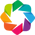

:Chord   [teamA,teamB]   (total_matches,winsA,winsB,source,target,value,opp_value,win_diff,edge_color,label)

In [351]:
import pandas as pd
import holoviews as hv
from holoviews import opts, dim
from bokeh.palettes import Category20

hv.extension('bokeh')


matches = pd.read_csv("/Users/sainihalkonduti/Downloads/matches.csv")
matches.columns = matches.columns.str.strip()
matches = matches[matches['winner'].notna()]
matches['date'] = pd.to_datetime(matches['date'], errors='coerce')
matches['Year'] = matches['date'].dt.year


team_name_corrections = {
    'Kings XI Punjab': 'Punjab Kings',
    'Royal Challengers Bengaluru': 'Royal Challengers Bangalore',
    'Delhi Daredevils': 'Delhi Capitals',
    'Rising Pune Supergiants': 'Rising Pune Supergiant',
}
abbrev_map = {
    'Mumbai Indians': 'MI',
    'Chennai Super Kings': 'CSK',
    'Kolkata Knight Riders': 'KKR',
    'Royal Challengers Bangalore': 'RCB',
    'Delhi Capitals': 'DC',
    'Sunrisers Hyderabad': 'SRH',
    'Punjab Kings': 'PBKS',
    'Rajasthan Royals': 'RR',
    'Deccan Chargers': 'DCG'
}
for col in ['team1', 'team2', 'winner']:
    matches[col] = matches[col].replace(team_name_corrections).replace(abbrev_map)


team_years = pd.concat([
    matches[['team1', 'Year']].rename(columns={'team1': 'Team'}),
    matches[['team2', 'Year']].rename(columns={'team2': 'Team'})
])
long_term_teams = team_years.drop_duplicates().groupby('Team').size()
long_term_teams = long_term_teams[long_term_teams >= 10].index.tolist()


filtered_matches = matches[
    matches['team1'].isin(long_term_teams) &
    matches['team2'].isin(long_term_teams)
]


all_rivalries = []
for _, row in filtered_matches.iterrows():
    t1, t2 = sorted([row['team1'], row['team2']])
    winner = row['winner']
    all_rivalries.append((t1, t2, winner))
rivalry_df = pd.DataFrame(all_rivalries, columns=['teamA', 'teamB', 'winner'])


match_counts = rivalry_df.groupby(['teamA', 'teamB']).size().reset_index(name='total_matches')
wins_A = rivalry_df[rivalry_df['winner'] == rivalry_df['teamA']].groupby(['teamA', 'teamB']).size().reset_index(name='winsA')
wins_B = rivalry_df[rivalry_df['winner'] == rivalry_df['teamB']].groupby(['teamA', 'teamB']).size().reset_index(name='winsB')


merged = match_counts.merge(wins_A, on=['teamA', 'teamB'], how='left') \
                     .merge(wins_B, on=['teamA', 'teamB'], how='left')
merged['winsA'] = merged['winsA'].fillna(0).astype(int)
merged['winsB'] = merged['winsB'].fillna(0).astype(int)


def get_direction(row):
    if row['winsA'] >= row['winsB']:
        return pd.Series([row['teamA'], row['teamB'], row['winsA'], row['winsB']], index=['source', 'target', 'value', 'opp_value'])
    else:
        return pd.Series([row['teamB'], row['teamA'], row['winsB'], row['winsA']], index=['source', 'target', 'value', 'opp_value'])

final_df = merged.copy()
final_df[['source', 'target', 'value', 'opp_value']] = final_df.apply(get_direction, axis=1)
final_df['win_diff'] = final_df['value'] - final_df['opp_value']


teams = sorted(set(final_df['source']).union(set(final_df['target'])))
nodes = pd.DataFrame({'name': teams})
available_colors = [c for c in Category20[20] if 'green' not in c.lower()]
while len(available_colors) < len(nodes):
    available_colors *= 2
nodes['color'] = available_colors[:len(nodes)]
team_color_map = nodes.set_index('name')['color'].to_dict()


final_df['is_rivalry'] = ((final_df['value'] >= 15) & (final_df['win_diff'] >= 5)) | (final_df['total_matches'] > 35)


def assign_color(row):
    if row['is_rivalry']:
        return team_color_map.get(row['source'], 'gray')
    else:
        return 'green'

final_df['edge_color'] = final_df.apply(assign_color, axis=1)
final_df['label'] = final_df.apply(lambda row: f"{row['source']} → {row['target']}: {row['value']} wins", axis=1)


chord = hv.Chord((final_df.drop(columns=['is_rivalry']), hv.Dataset(nodes, 'name'))).opts(
    opts.Chord(
        width=950, height=950,
        labels='name',
        node_color='name',
        cmap=team_color_map,
        edge_color=dim('edge_color'),
        edge_line_width=dim('value') * 0.2,
        node_size=30,
        node_line_width=2,
        node_line_color='black',
        label_text_font_size='12pt',
        label_text_color='black',
        title="🏏 IPL Matchups: All Shown, Rivalries Highlighted by Team Color",
        tools=['hover'],
        inspection_policy='edges'
    )
)

# Display in notebook
chord


---

### 🔍 Insights

- 🏆 **Mumbai Indians vs Chennai Super Kings** is one of the most played and balanced rivalries, although MI slightly leads in overall wins.
- 🔥 **RCB vs KKR** and **CSK vs RCB** stand out as high-volume, high-intensity rivalries—with clear dominance evident from edge direction and width.
- 🟢 **Green edges** indicate non-rivalry matchups, often among teams with fewer seasons or closer win margins.
- 🎯 **Dominance is visualized** through thick, uni-directional flows—e.g., teams like MI and CSK often show dominant edges toward teams like PBKS or DC.
- 🔄 Some rivalries, despite high volume (like MI vs KKR), maintain relatively even win shares, reflecting **highly contested histories**.

🧠 **Key Takeaway**:  
The IPL's most storied rivalries are not just about frequency—they're built on dominance, legacy, and narrative tension. Chord diagrams like this highlight the evolving dynamics of power and pride in the league.


### 🧩 The Underdog Story – Which Teams Have Overachieved or Underperformed?

Not every IPL season goes as expected. These charts explore the **performance difference** between expected and actual outcomes, highlighting teams that **exceeded expectations** or **underperformed**.

- **Chart 1: All Teams (Including New Entrants)**  
  This comprehensive view includes **every IPL team**, from legacy franchises to short-term and new entrants (e.g., Gujarat Titans, LSG, Rising Pune Supergiant). Positive bars indicate seasons where teams outperformed projections, while negative bars capture letdowns.

- **Chart 2: Long-Term Teams Who Beat Expectations**  
  Zooms in on **established franchises** (CSK, MI, KKR, RCB, etc.), allowing us to analyze trends of consistent overachievement or underperformance across seasons for teams with a decade-long presence.



In [337]:
import pandas as pd


matches_df = pd.read_csv('/Users/sainihalkonduti/Downloads/Updated_Matches.csv')
ipl_data = pd.read_csv('/Users/sainihalkonduti/Downloads/Ipl20.csv')

matches_df.columns = matches_df.columns.str.strip()
ipl_data.columns = ipl_data.columns.str.strip()


matches_df['date'] = pd.to_datetime(matches_df['date'], errors='coerce')


matches_df['season'] = matches_df['date'].dt.year


matches_summary = matches_df[['season', 'team1', 'team2', 'winner']]


team_matches = pd.melt(
    matches_summary,
    id_vars=['season', 'winner'],
    value_vars=['team1', 'team2'],
    var_name='team_pos',
    value_name='team'
)

team_matches['won'] = team_matches['team'] == team_matches['winner']


season_team_performance = (
    team_matches.groupby(['team', 'season'])['won']
    .agg(['sum', 'count'])
    .rename(columns={'sum': 'wins', 'count': 'matches'})
    .reset_index()
)
season_team_performance['win_percent'] = (
    season_team_performance['wins'] / season_team_performance['matches']
)


season_team_performance.sort_values(by=['team', 'season'], inplace=True)
season_team_performance['expected_win_percent'] = (
    season_team_performance.groupby('team')['win_percent']
    .transform(lambda x: x.shift(1).rolling(3, min_periods=1).mean())
)


season_team_performance['performance_diff'] = (
    season_team_performance['win_percent'] - season_team_performance['expected_win_percent']
)



/var/folders/6n/r3q3rg4s2_9bpln0zbw7x0kh0000gn/T/ipykernel_43191/3541651049.py:23: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/6n/r3q3rg4s2_9bpln0zbw7x0kh0000gn/T/ipykernel_43191/3541651049.py:26: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



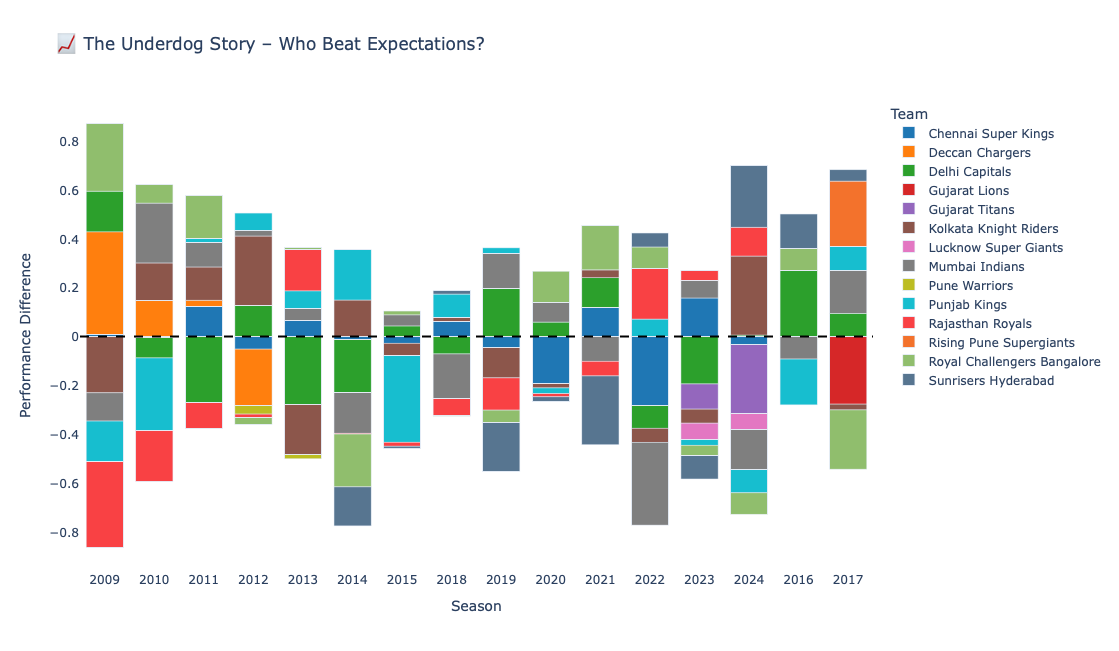

In [339]:
import plotly.express as px

# Define a distinct color for each team (manually picked or use any palette generator)
team_colors = {
    "Chennai Super Kings": "#1f77b4",
    "Deccan Chargers": "#ff7f0e",
    "Delhi Capitals": "#2ca02c",
    "Gujarat Lions": "#d62728",
    "Gujarat Titans": "#9467bd",
    "Kolkata Knight Riders": "#8c564b",
    "Lucknow Super Giants": "#e377c2",
    "Mumbai Indians": "#7f7f7f",
    "Pune Warriors": "#bcbd22",
    "Punjab Kings": "#17becf",
    "Rajasthan Royals": "#f94144",
    "Rising Pune Supergiants": "#f3722c",
    "Royal Challengers Bangalore": "#90be6d",
    "Sunrisers Hyderabad": "#577590"
}

# Drop missing values
plot_df = season_team_performance.dropna(subset=['performance_diff'])
plot_df['season'] = plot_df['season'].astype(str)

# Apply color mapping
plot_df['color'] = plot_df['team'].map(team_colors)

# Create the bar chart
fig = px.bar(
    plot_df,
    x="season",
    y="performance_diff",
    color="team",
    color_discrete_map=team_colors,
    hover_data={
        "team": True,
        "season": True,
        "win_percent": ':.2f',
        "expected_win_percent": ':.2f',
        "performance_diff": ':.2f'
    },
    labels={"performance_diff": "Actual Win % – Expected Win %"},
    title="📈 The Underdog Story – Who Beat Expectations?"
)

fig.update_layout(
    xaxis_title="Season",
    yaxis_title="Performance Difference",
    bargap=0.25,
    height=650,
    legend_title="Team",
    hoverlabel=dict(bgcolor="white", font_size=12, font_family="Arial"),
    plot_bgcolor="white"
)

fig.add_hline(y=0, line_dash="dash", line_color="black")
fig.show()


/var/folders/6n/r3q3rg4s2_9bpln0zbw7x0kh0000gn/T/ipykernel_43191/3293698192.py:44: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.



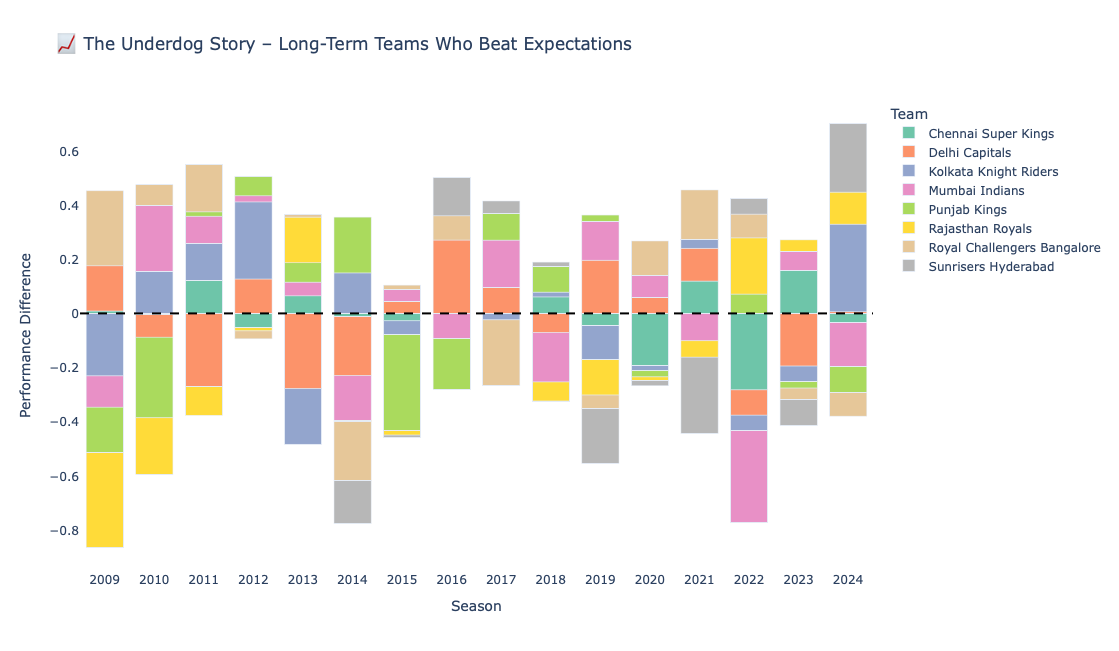

In [341]:
import pandas as pd
import plotly.express as px
from matplotlib.cm import get_cmap


matches_df = pd.read_csv("/Users/sainihalkonduti/Downloads/Updated_Matches.csv")
matches_df.columns = matches_df.columns.str.strip()
matches_df['date'] = pd.to_datetime(matches_df['date'], errors='coerce')
matches_df['season'] = matches_df['date'].dt.year


matches_summary = matches_df[['season', 'team1', 'team2', 'winner']]
team_matches = pd.melt(matches_summary, id_vars=['season', 'winner'], value_vars=['team1', 'team2'],
                       var_name='team_pos', value_name='team')
team_matches['won'] = team_matches['team'] == team_matches['winner']


season_team_performance = (
    team_matches.groupby(['team', 'season'])['won']
    .agg(['sum', 'count'])
    .rename(columns={'sum': 'wins', 'count': 'matches'})
    .reset_index()
)
season_team_performance['win_percent'] = (
    season_team_performance['wins'] / season_team_performance['matches']
)
season_team_performance.sort_values(by=['team', 'season'], inplace=True)
season_team_performance['expected_win_percent'] = (
    season_team_performance.groupby('team')['win_percent']
    .transform(lambda x: x.shift(1).rolling(3, min_periods=1).mean())
)
season_team_performance['performance_diff'] = (
    season_team_performance['win_percent'] - season_team_performance['expected_win_percent']
)


team_counts = season_team_performance.groupby('team')['season'].nunique().reset_index()
long_term_teams = team_counts[team_counts['season'] > 10]['team'].tolist()
filtered_df = season_team_performance[
    season_team_performance['team'].isin(long_term_teams)
].dropna(subset=['performance_diff'])


cmap = get_cmap("Set2")
team_color_map = {
    team: f"rgba{tuple(int(c * 255) for c in cmap(i)[:3]) + (0.95,)}"
    for i, team in enumerate(long_term_teams)
}

# === Fix season order (e.g., ensure 2016, 2017 stay in place) ===
ordered_seasons = sorted(filtered_df['season'].unique())
filtered_df['season'] = pd.Categorical(
    filtered_df['season'].astype(str),
    categories=[str(s) for s in ordered_seasons],
    ordered=True
)
category_order = {"season": [str(s) for s in ordered_seasons]}  # 👈 Force correct X-axis order

# === Plot with Plotly ===
fig = px.bar(
    filtered_df,
    x="season",
    y="performance_diff",
    color="team",
    color_discrete_map=team_color_map,
    category_orders=category_order,
    hover_data={
        "team": True,
        "season": True,
        "win_percent": ':.2f',
        "expected_win_percent": ':.2f',
        "performance_diff": ':.2f'
    },
    labels={"performance_diff": "Actual Win % – Expected Win %"},
    title="📈 The Underdog Story – Long-Term Teams Who Beat Expectations"
)

fig.update_layout(
    xaxis_title="Season",
    yaxis_title="Performance Difference",
    bargap=0.25,
    height=650,
    legend_title="Team",
    hoverlabel=dict(bgcolor="white", font_size=12),
    plot_bgcolor="white"
)
fig.add_hline(y=0, line_dash="dash", line_color="black")

fig.show()


### 🔍 Insights: The Underdog Story – Overachievers and Underperformers in the IPL

- **Frequent Overachievers**:  
  - **Delhi Capitals** and **Punjab Kings** have several seasons where they **exceeded expectations**, particularly around 2014 and 2020. These spikes indicate breakout seasons often driven by youth-heavy squads or revamped leadership.
  - **Rajasthan Royals** showed a surprise resurgence in **2023**, performing well above pre-season predictions.

- **New Entrants Making a Mark**:  
  - **Gujarat Titans (2022)** had a stunning debut season, significantly outperforming expectations.
  - **Lucknow Super Giants** have also demonstrated strong starts compared to many debuting franchises.

- **Consistent Performers**:  
  - **Chennai Super Kings** and **Mumbai Indians**, though top-tier teams, often show minimal deviation from expected performance—suggesting **predictable dominance** rather than surprise outcomes.
  - Their performance is mostly aligned with expectations due to stable cores and strong leadership.

- **Frequent Underperformers**:  
  - **Royal Challengers Bangalore** and **Sunrisers Hyderabad** appear in the **negative zone** across multiple seasons, highlighting a recurring pattern of **falling short despite talent-heavy squads**.
  - **Rajasthan Royals** also dip below the zero line in several years post-2010, indicating inconsistency.

- **Unpredictable Teams**:  
  - Teams like **Kolkata Knight Riders** and **Sunrisers** swing between highs and lows, reflecting volatility in performance driven by player form, leadership changes, or auction strategies.

🧠 **Key Takeaway**:  
Overachievement in the IPL is often driven by smart recruitment, youth investment, or cohesive units rather than sheer star power. Meanwhile, several teams with marquee players still struggle with consistency, highlighting the complexity of T20 success.


---

### ⚡ Last-Over Thrillers – Identifying Teams That Excel in Crunch Situations

T20 games are often decided in the final over, where composure, match awareness, and execution matter most. This chart analyzes teams’ **win rates in last-over thrillers** (matches decided in the 20th over with close margins), considering teams with at least 3 such matches.

---

### 📊 Description of Chart

- **Horizontal bar chart** ranking teams by their win percentage in final-over thrillers.
- Focuses on **clutch performance** rather than overall dominance.
- Minimum threshold of 3 close games ensures statistical relevance.



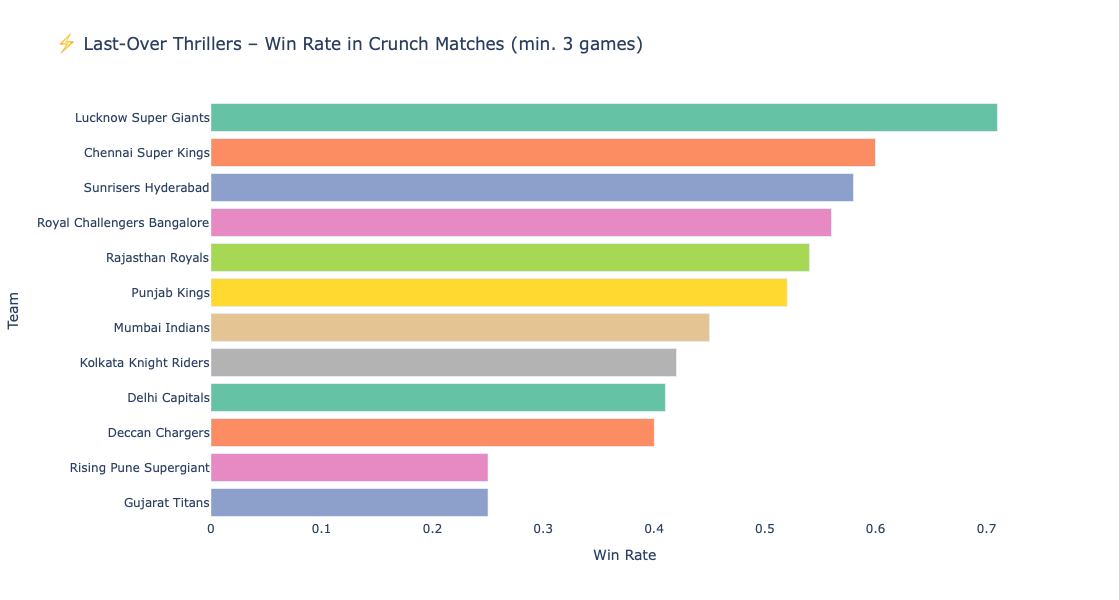

In [343]:
import pandas as pd
import plotly.express as px


matches_df = pd.read_csv("/Users/sainihalkonduti/Downloads/Updated_Matches.csv")
matches_df.columns = matches_df.columns.str.strip()
matches_df['date'] = pd.to_datetime(matches_df['date'], errors='coerce')
matches_df['season'] = matches_df['date'].dt.year


team_name_corrections = {
    'Kings XI Punjab': 'Punjab Kings',
    'Delhi Daredevils': 'Delhi Capitals',
    'Royal Challengers Bengaluru': 'Royal Challengers Bangalore',
    'Rising Pune Supergiants': 'Rising Pune Supergiant',
    'Rising Pune Supergiant': 'Rising Pune Supergiant'
}
for col in ['team1', 'team2', 'winner']:
    matches_df[col] = matches_df[col].replace(team_name_corrections)


close_defense = matches_df[(matches_df['result'] == 'runs') & (matches_df['result_margin'] <= 6)]
close_chase = matches_df[(matches_df['result'] == 'wickets') & (matches_df['result_margin'] <= 2)]
thrillers_df = pd.concat([close_defense, close_chase])


thriller_teams = pd.melt(
    thrillers_df,
    id_vars=['season', 'winner'],
    value_vars=['team1', 'team2'],
    var_name='pos', value_name='team'
)
thriller_teams['won_thriller'] = thriller_teams['team'] == thriller_teams['winner']


clutch_stats = thriller_teams.groupby('team')['won_thriller'].agg(['sum', 'count']).reset_index()
clutch_stats.columns = ['team', 'thrillers_won', 'thrillers_played']
clutch_stats['thriller_win_rate'] = clutch_stats['thrillers_won'] / clutch_stats['thrillers_played']
clutch_stats['thriller_win_rate'] = clutch_stats['thriller_win_rate'].round(2)


plot_df = clutch_stats[clutch_stats['thrillers_played'] >= 3].sort_values(by='thriller_win_rate', ascending=False)


fig = px.bar(
    plot_df,
    x='thriller_win_rate',
    y='team',
    orientation='h',
    color='team',
    color_discrete_sequence=px.colors.qualitative.Set2,
    hover_data={
        "team": True,
        "thriller_win_rate": ':.2f',
        "thrillers_won": True,
        "thrillers_played": True
    },
    labels={
        "thriller_win_rate": "Win Rate",
        "team": "Team"
    },
    title="⚡ Last-Over Thrillers – Win Rate in Crunch Matches (min. 3 games)"
)

fig.update_layout(
    yaxis=dict(categoryorder='total ascending'),
    height=600,
    showlegend=False,
    plot_bgcolor='white'
)

fig.show()


### 🔍 Insights

- 🥇 **Lucknow Super Giants** top the list, showcasing strong nerves and match management in tight finishes—despite being a new entrant.
- 🔥 **Chennai Super Kings** and **Sunrisers Hyderabad** follow closely, reflecting **captaincy experience** (e.g., Dhoni) and depth in death bowling.
- 🧠 **RCB** and **Rajasthan Royals** show strong finish-game tactics, often edging out opponents under pressure.
- ⚖️ **Mumbai Indians** and **KKR**, though dominant teams historically, appear **mid-table** in crunch scenarios—suggesting occasional late-game slips.
- 🧊 **Gujarat Titans** and **Rising Pune Supergiant** sit at the bottom, struggling to close out thrillers despite talent, possibly due to inexperience or poor end-game strategies.

🧠 **Key Takeaway**: Excelling in last-over thrillers requires more than just skill—it’s about leadership, calm under pressure, and tactical clarity. Some newer teams are rising fast in this area, outperforming even the legacy giants.

---

---

### 🏁 Conclusion: What the Data Reveals About the IPL

The Indian Premier League is more than just a cricket tournament—it's a blend of performance, strategy, emotion, and evolving narratives. Through visual analytics, we’ve uncovered several key stories that define the league's essence:

---

#### 🔥 Team Dominance and Consistency
- Mumbai Indians and Chennai Super Kings have **dominated IPL history**, not just with total wins but with sustained excellence across seasons and pressure situations.
- Kolkata Knight Riders stand out for their **playoff composure**, while teams like Delhi Capitals and Punjab Kings often fall short in clutch moments.

---

#### 👑 Players Who Shape Outcomes
- **Rose charts** of consistent top run-scorers reveal players like Kohli, Warner, and Raina as enduring batting anchors.
- Yet, **violin plots** on wicket distributions show that bowlers are the true match-winners for championship teams—effective bowling is a more consistent ingredient for titles.

---

#### 🧨 Underdogs and Overachievers
- Some teams defy expectations with standout underdog seasons, while others underperform relative to their squad strength. This narrative comes alive in **performance deviation charts**.

---

#### 🧠 Pressure Handling in Playoffs
- **Box plots comparing league vs playoff stages** show which teams elevate or drop their level. KKR and CSK improve under pressure, while others fade when it matters most.

---

#### 🔁 Rivalries and One-Sided Matchups
- The **Chord Diagram and Heatmap** reveal IPL's most iconic rivalries (like MI vs CSK) and also expose **cursed matchups**, where certain teams habitually dominate others.

---

#### ⚡ Crunch Moments and Finishing Prowess
- **Last-over thriller analysis** shows teams like LSG and CSK excel in tight finishes, proving the value of temperament and leadership in final-over chaos.

---

#### 📣 Popularity vs Performance
- The **bubble chart** reveals that success often correlates with brand value growth—but not always. Fan engagement also depends on player loyalty, city identity, and thrilling gameplay.

---

### 🎯 Final Takeaway:
The IPL is a **data-rich spectacle** where performance, rivalry, consistency, and strategy converge. Teams that balance all dimensions—batting, bowling, handling pressure, and building narratives—emerge not just as winners, but as legends.

Visual storytelling allows us to **decode cricketing success**, and in doing so, appreciate the nuance behind every title, rivalry, and turnaround.
